In [2]:
## Reading Files
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import sklearn
import plotly.express as px
from pandas import Period
from scipy import stats
import re

In [4]:
%matplotlib inline

In [5]:
final_df = pd.read_csv('/content/drive/MyDrive/Capstone Data/final_dataset.csv')

In [13]:
final_df = final_df[final_df['Profit_Margin'] >-15]

## EDA

#### Missing & Duplicates Check

In [14]:
data_overview = final_df.describe(include='all')
data_overview

,Year,Month,Group,customer_category,Product_Class,Stock,Profit_Margin,Date
count,46909.000000,46909.000000,46909,46909,46909,46909,46909.000000,46909
unique,NaN,NaN,2,3,450,2,NaN,45
top,NaN,NaN,Const Supplies CS/SD,Better,ABRFLD,N,NaN,2021-11-01
freq,NaN,NaN,30325,16820,346,27104,NaN,1226
mean,2021.371912,6.258479,NaN,NaN,NaN,NaN,25.590071,NaN
std,1.055544,3.369220,NaN,NaN,NaN,NaN,10.461396,NaN
min,2020.000000,1.000000,NaN,NaN,NaN,NaN,-14.857143,NaN
25%,2020.000000,3.000000,NaN,NaN,NaN,NaN,19.663735,NaN
50%,2021.000000,6.000000,NaN,NaN,NaN,NaN,25.000000,NaN
75%,2022.000000,9.000000,NaN,NaN,NaN,NaN,30.065898,NaN


In [15]:
missing_values = final_df.isnull().sum()
missing_values

Year                 0
Month                0
Group                0
customer_category    0
Product_Class        0
Stock                0
Profit_Margin        0
Date                 0
dtype: int64

In [16]:
duplicate_rows = final_df.duplicated().sum()
duplicate_rows

0

In [17]:
extreme_df = final_df[final_df['Profit_Margin'] < 0]

In [18]:
extreme_df.describe()

,Year,Month,Profit_Margin
count,332.000000,332.000000,332.000000
mean,2021.210843,6.259036,-6.162908
std,0.925048,3.570491,4.097538
min,2020.000000,1.000000,-14.857143
25%,2020.000000,3.000000,-10.000000
50%,2021.000000,6.000000,-5.852837
75%,2022.000000,9.250000,-2.443065
max,2023.000000,12.000000,-0.013268


In [ ]:
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=extreme_df, y='Profit_Margin')
# plt.title('Boxplot of Profit Margin (Profit_Margin < 0)')
# plt.ylabel('Profit Margin')
# plt.show()

#### Normality Check

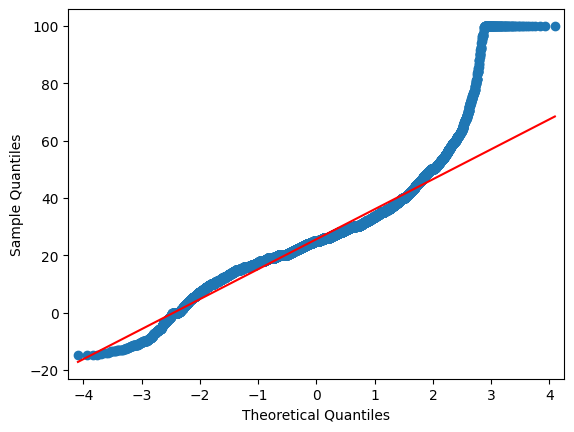

In [19]:
# prompt: qqplot

import statsmodels.api as sm

# Create a QQ plot
sm.qqplot(final_df['Profit_Margin'], line='s')

# Display the plot
plt.show()


In [20]:
percentile_25 = extreme_df['Profit_Margin'].quantile(0.25)
df = final_df[final_df['Profit_Margin'] > percentile_25]

In [21]:
final_df['Profit_Margin'].quantile(0.05)

11.531304246081612

In [22]:
df

,Year,Month,Group,customer_category,Product_Class,Stock,Profit_Margin,Date
0,2020,1,Const Supplies CS/SD,Best,ABRFLW,Y,29.250898,2020-01-01
1,2020,1,Const Supplies CS/SD,Best,ABRMAN,N,43.715031,2020-01-01
2,2020,1,Const Supplies CS/SD,Best,ABRMIS,N,25.501433,2020-01-01
3,2020,1,Const Supplies CS/SD,Best,ABRRFD,N,34.000000,2020-01-01
4,2020,1,Const Supplies CS/SD,Best,BRUBRO,Y,12.946461,2020-01-01
...,...,...,...,...,...,...,...,...
47152,2023,9,Welding Equip WS/SD,Good,WLDDRI,N,34.997854,2023-09-01
47153,2023,9,Welding Equip WS/SD,Good,WLDEMF,N,7.000388,2023-09-01
47154,2023,9,Welding Equip WS/SD,Good,WLDEMF,Y,20.000000,2023-09-01
47155,2023,9,Welding Equip WS/SD,Good,WLDMIS,N,18.000000,2023-09-01


In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year-Month'] = df['Date'].dt.strftime('%Y-%m')

<ipython-input-24-7a513b50c54c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-24-7a513b50c54c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Month'] = df['Date'].dt.strftime('%Y-%m')


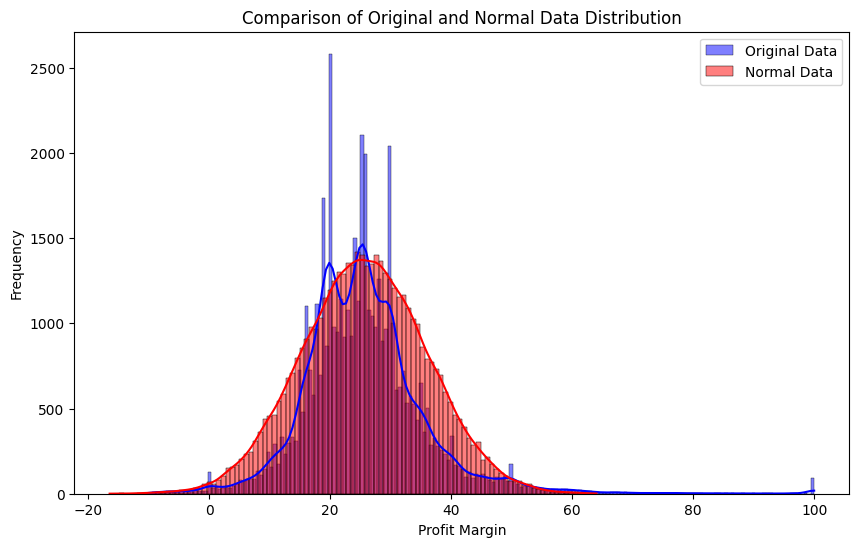

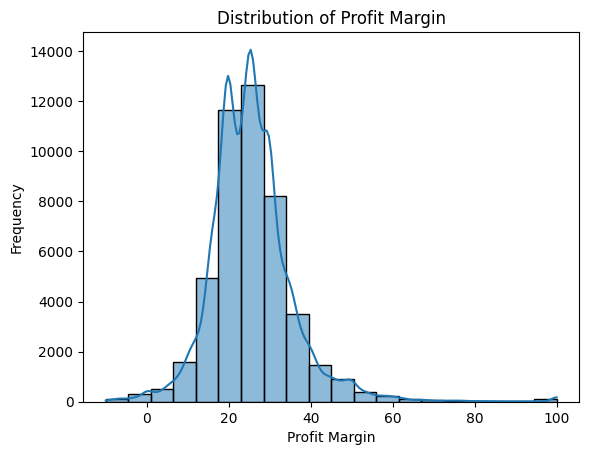

In [25]:
original_data = df['Profit_Margin']

synthetic_data = np.random.normal(loc=original_data.mean(), scale=original_data.std(), size=len(original_data))

plt.figure(figsize=(10, 6))

sns.histplot(original_data, kde=True, color='blue', label='Original Data')

sns.histplot(synthetic_data, kde=True, color='red', label='Normal Data')

plt.title('Comparison of Original and Normal Data Distribution')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.legend()
plt.show()

sns.histplot(data=df, x='Profit_Margin', bins=20, kde=True)
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

#### Other Attribute Graphs

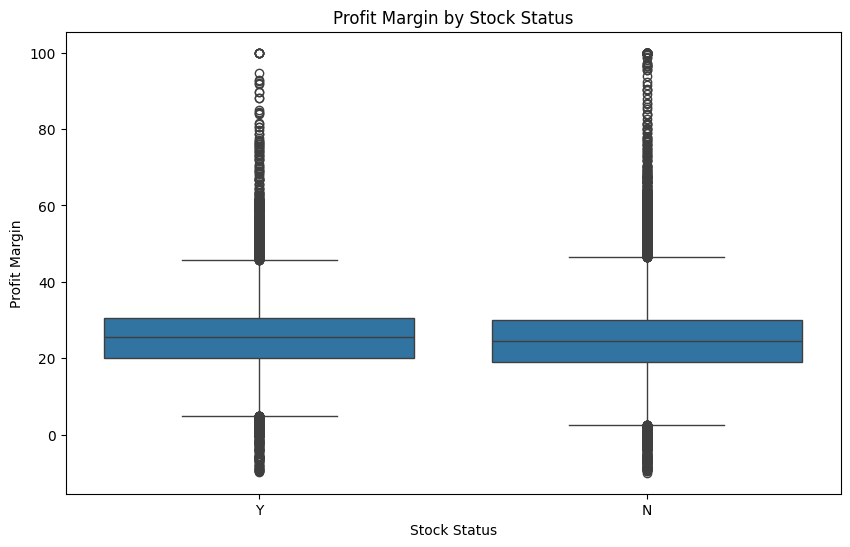

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stock', y='Profit_Margin', data=df)
plt.title('Profit Margin by Stock Status')
plt.xlabel('Stock Status')
plt.ylabel('Profit Margin')
plt.show()

In [27]:
in_stock = df[df['Stock'] == 'Y']['Profit_Margin']
out_of_stock = df[df['Stock'] == 'N']['Profit_Margin']

In [ ]:
# from scipy.stats import shapiro, levene, mannwhitneyu

# shapiro_in_stock = shapiro(in_stock)
# shapiro_out_of_stock = shapiro(out_of_stock)

# levenes_test = levene(in_stock, out_of_stock)

# mann_whitney_test_result = mannwhitneyu(in_stock, out_of_stock)

# # Output the results
# print(f"Shapiro-Wilk test p-values: {shapiro_in_stock.pvalue:.4f} (in stock), {shapiro_out_of_stock.pvalue:.4f} (out of stock)")
# print(f"Levene's test p-value: {levenes_test.pvalue:.4f}")
# print(f"Mann-Whitney U test p-value: {mann_whitney_test_result.pvalue:.4f}")

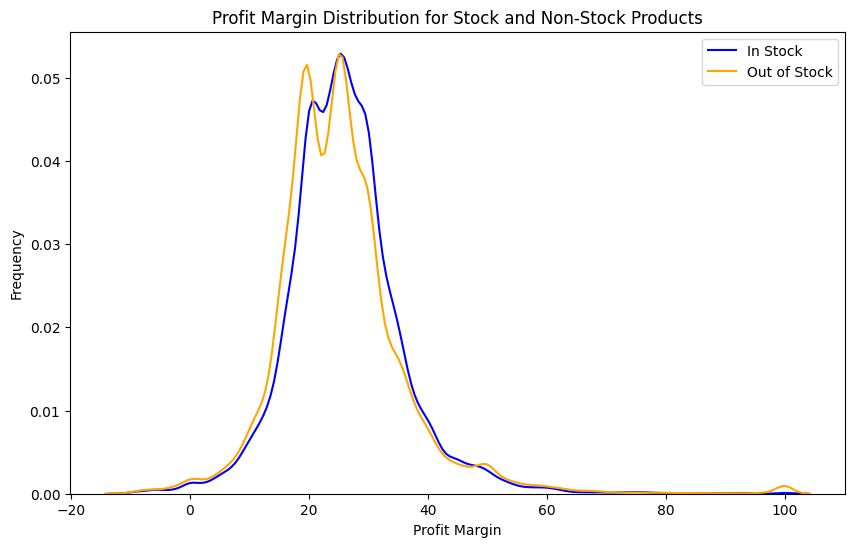

In [28]:
plt.figure(figsize=(10, 6))

sns.kdeplot(in_stock, color='blue', label='In Stock')

sns.kdeplot(out_of_stock, color='orange', label='Out of Stock')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.title('Profit Margin Distribution for Stock and Non-Stock Products')

plt.legend()

plt.show()

<ipython-input-29-71712e305ecd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year-Month', y='Profit_Margin', hue='Stock', data=df, ci=None)


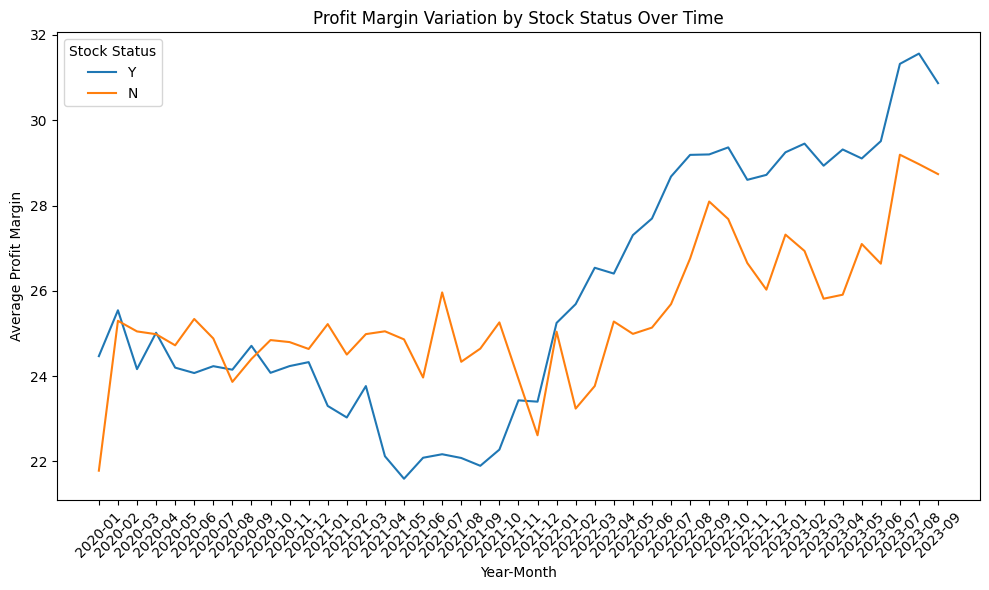

In [29]:
plt.figure(figsize=(10, 6))
# sns.lineplot(x='Year-Month', y='Profit_Margin', hue='Stock', data=df, ci=None)  # Set ci to None to remove shaded area
sns.lineplot(x='Year-Month', y='Profit_Margin', hue='Stock', data=df, ci=None)
plt.title('Profit Margin Variation by Stock Status Over Time')
# plt.xlabel('Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Profit Margin')
plt.legend(title='Stock Status', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

<ipython-input-30-276317161641>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_category', y='Profit_Margin', palette='Set3', data=df)


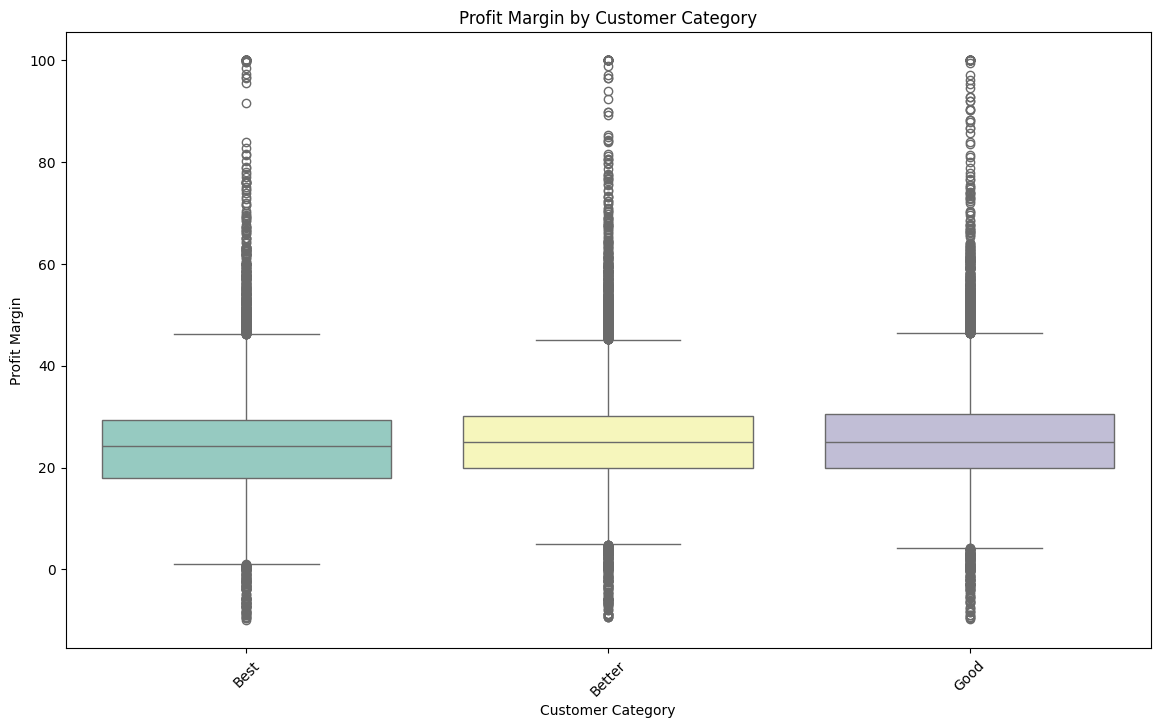

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='customer_category', y='Profit_Margin', palette='Set3', data=df)
plt.title('Profit Margin by Customer Category')
plt.xlabel('Customer Category')
plt.xticks(rotation=45)
plt.ylabel('Profit Margin')
plt.show()

<ipython-input-31-ddf68167971e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year-Month', y='Profit_Margin', hue='customer_category', data=df, ci=None)


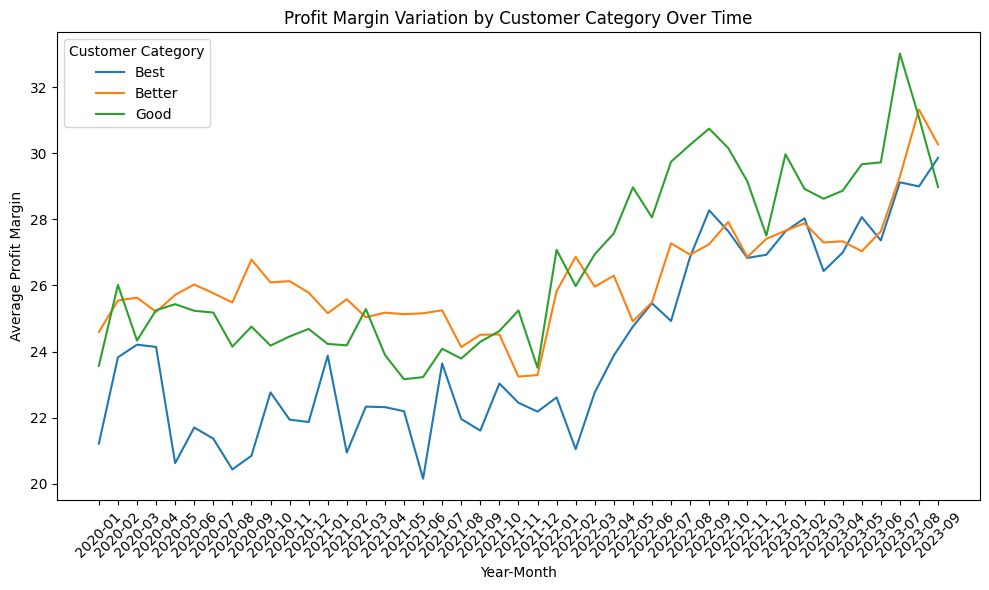

In [31]:
plt.figure(figsize=(10, 6))
# sns.lineplot(x='Year-Month', y='Profit_Margin', hue='customer_category', data=df, ci=None)  # Set ci to None to remove shaded area
sns.lineplot(x='Year-Month', y='Profit_Margin', hue='customer_category', data=df, ci=None)
plt.title('Profit Margin Variation by Customer Category Over Time')
# plt.xlabel('Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Profit Margin')
plt.legend(title='Customer Category', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

<ipython-input-32-ec447c61be3d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Profit_Margin', data=df, estimator='mean', ci=None, markers=True, dashes=False)


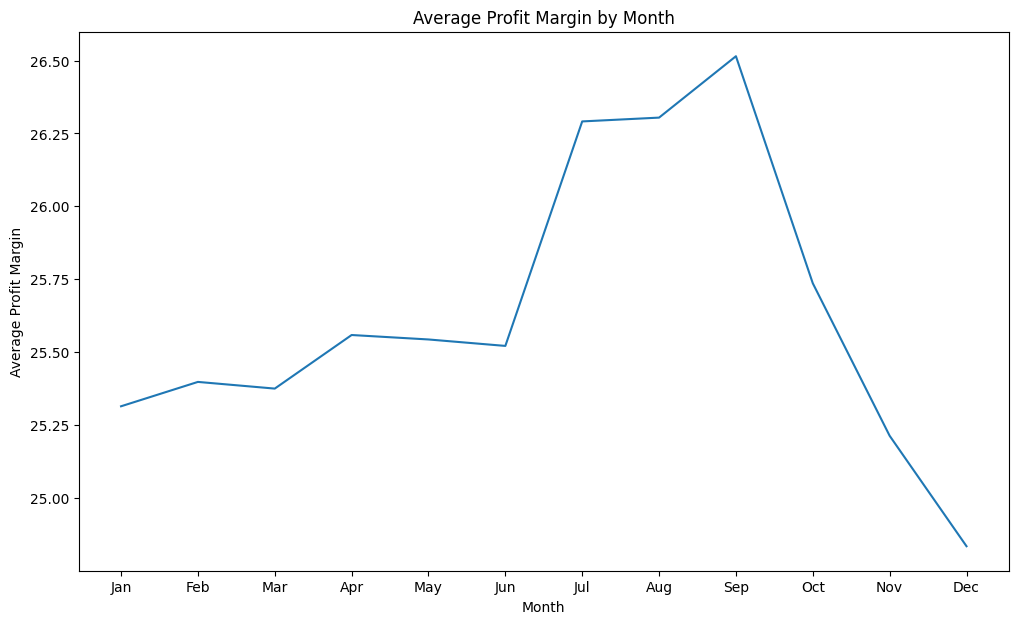

In [32]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='Month', y='Profit_Margin', data=df, estimator='mean', ci=None, markers=True, dashes=False)
plt.title('Average Profit Margin by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit Margin')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
# from scipy.stats import f_oneway, kruskal

# categorical_variable = df['']  # Replace 'Group' with the categorical variable you want to examine
# numerical_variable = df['Profit_Margin']

# # Perform ANOVA test (for normally distributed data) or Kruskal-Wallis H-test (for non-normally distributed data)
# # Check for normality before choosing between ANOVA and Kruskal-Wallis H-test
# # For ANOVA, use f_oneway; for Kruskal-Wallis H-test, use kruskal
# # For example, using ANOVA:
# f_statistic, p_value = f_oneway(*[numerical_variable[categorical_variable == category] for category in categorical_variable.unique()])

# # For example, using Kruskal-Wallis H-test:
# # h_statistic, p_value = kruskal(*[numerical_variable[categorical_variable == category] for category in categorical_variable.unique()])

# print("F-statistic:", f_statistic)
# print("p-value:", p_value)

#### Lag Graph

In [33]:
app_df = df[(df['Group'] == 'Welding Equip WS/SD')&(df['Product_Class']=='APPPRT')&(df['customer_category']=='Better')].groupby(['Year','Month'])['Profit_Margin'].mean().reset_index()

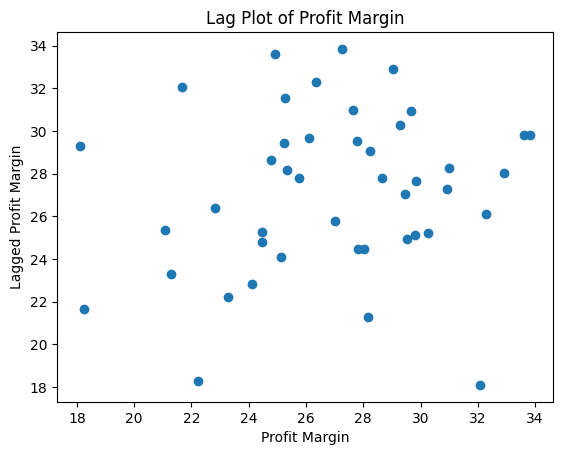

In [34]:
from matplotlib import pyplot
from pandas.plotting import lag_plot

app_df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Set 'Date' as the index
app_df.set_index('Date', inplace=True)

# Create the lag plot
lag_plot(app_df['Profit_Margin'])

# Optionally, you can set titles and labels
plt.title('Lag Plot of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Lagged Profit Margin')

# Show the plot
plt.show()

## Model Exploration

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import lightgbm as lgb
import xgboost as xgb

### Time Series Model Preparation

#### Only Product Class

In [35]:
final_df

,Year,Month,Group,customer_category,Product_Class,Stock,Profit_Margin,Date
0,2020,1,Const Supplies CS/SD,Best,ABRFLW,Y,29.250898,2020-01-01
1,2020,1,Const Supplies CS/SD,Best,ABRMAN,N,43.715031,2020-01-01
2,2020,1,Const Supplies CS/SD,Best,ABRMIS,N,25.501433,2020-01-01
3,2020,1,Const Supplies CS/SD,Best,ABRRFD,N,34.000000,2020-01-01
4,2020,1,Const Supplies CS/SD,Best,BRUBRO,Y,12.946461,2020-01-01
...,...,...,...,...,...,...,...,...
47152,2023,9,Welding Equip WS/SD,Good,WLDDRI,N,34.997854,2023-09-01
47153,2023,9,Welding Equip WS/SD,Good,WLDEMF,N,7.000388,2023-09-01
47154,2023,9,Welding Equip WS/SD,Good,WLDEMF,Y,20.000000,2023-09-01
47155,2023,9,Welding Equip WS/SD,Good,WLDMIS,N,18.000000,2023-09-01


In [36]:
final_df['Date'] = pd.to_datetime(final_df[['Year', 'Month']].assign(DAY=1))

<ipython-input-36-58873e58f317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Date'] = pd.to_datetime(final_df[['Year', 'Month']].assign(DAY=1))


In [37]:
prophet_df = final_df.copy().groupby(['Group','Product_Class','Date'])['Profit_Margin'].median().reset_index()

> Only examine product class, profit margin, and time relationship

In [38]:
date_prophet_df = prophet_df.groupby(['Group','Product_Class']).agg({'Date': 'nunique'}).reset_index()

In [39]:
valid_df = date_prophet_df[date_prophet_df['Date'] == 45]

In [40]:
valid_df

,Group,Product_Class,Date
3,Const Supplies CS/SD,ABRCON,45
7,Const Supplies CS/SD,ABRFLW,45
9,Const Supplies CS/SD,ABRHAN,45
10,Const Supplies CS/SD,ABRMAN,45
11,Const Supplies CS/SD,ABRMIS,45
...,...,...,...
514,Welding Equip WS/SD,WEMGRO,45
515,Welding Equip WS/SD,WEMMAR,45
518,Welding Equip WS/SD,WEMSTR,45
521,Welding Equip WS/SD,WLDDRI,45


In [41]:
valid_product_pairs = [(row['Group'], row['Product_Class']) for index, row in valid_df.iterrows()]

In [42]:
len(valid_product_pairs)

166

166 products

In [43]:
valid_df = pd.DataFrame(valid_product_pairs, columns=['Group', 'Product_Class'])

In [44]:
valid_product_list = [product_class for group, product_class in valid_product_pairs]

In [45]:
filtered_prophet_df = prophet_df.merge(valid_df, on=['Group', 'Product_Class'], how='inner')

In [46]:
filtered_prophet_df

,Group,Product_Class,Date,Profit_Margin
0,Const Supplies CS/SD,ABRCON,2020-01-01,26.540541
1,Const Supplies CS/SD,ABRCON,2020-02-01,28.056851
2,Const Supplies CS/SD,ABRCON,2020-03-01,19.059606
3,Const Supplies CS/SD,ABRCON,2020-04-01,28.234903
4,Const Supplies CS/SD,ABRCON,2020-05-01,19.031142
...,...,...,...,...
7465,Welding Equip WS/SD,WLDEMF,2023-05-01,13.514567
7466,Welding Equip WS/SD,WLDEMF,2023-06-01,9.792359
7467,Welding Equip WS/SD,WLDEMF,2023-07-01,7.999942
7468,Welding Equip WS/SD,WLDEMF,2023-08-01,9.889812


In [47]:
filtered_prophet_df.to_csv('/content/drive/MyDrive/Capstone Data/valid_df.csv',index=False)

In [48]:
filtered_prophet_train_df = filtered_prophet_df[filtered_prophet_df['Date'].dt.year <2023]

In [49]:
filtered_prophet_test_df = filtered_prophet_df[filtered_prophet_df['Date'].dt.year>=2023]

In [50]:
filtered_prophet_train_df = filtered_prophet_train_df.rename(columns={"Date": "ds","Profit_Margin": "y"})

#### Prophet Model 1

In [ ]:
def prophet_model(product):
  df = filtered_prophet_train_df[filtered_prophet_train_df['Product_Class']==product]
  model_prophet = Prophet(interval_width=0.95)
  model_prophet.fit(df)
  ## Cross Validation
  # df_cv = cross_validation(model_prophet, initial='730 days', period='180 days', horizon='365 days')

  df_future = model_prophet.make_future_dataframe(periods=9, freq='MS')
  forecast_prophet = model_prophet.predict(df_future)
  forecast_2023 = forecast_prophet[(forecast_prophet['ds'].dt.year == 2023)]['yhat']
  actual_2023 = filtered_prophet_test_df[filtered_prophet_test_df['Product_Class']==product]['Profit_Margin']
  rmse = np.sqrt(mean_squared_error(forecast_2023, actual_2023))
  return product, rmse


In [ ]:
error_products = []
results_dict = {}
for product in valid_product_list:
    try:
        # Call the prophet_model function for each product
        product, rmse = prophet_model(product)
        results_dict[product] = rmse
    except ValueError as e:
        # If ValueError occurs, store the product name in the error_products list
        error_products.append(product)
        print(f"Error encountered for product: {product}. Error message: {str(e)}")

print("Products encountering errors:", error_products)

In [ ]:
result_df = pd.DataFrame(list(results_dict.items()), columns=['Product_Class', 'RMSE'])

In [ ]:
pm_result = filtered_prophet_df.groupby(['Product_Class'])['Profit_Margin'].median().reset_index()

In [ ]:
result_df.merge(pm_result,how='left')

,Product_Class,RMSE,Profit_Margin
0,ABRCON,10.928995,24.278180
1,ABRFLW,3.013020,28.295527
2,ABRHAN,15.165963,27.772903
3,ABRMAN,5.494563,27.793548
4,ABRMIS,6.874364,25.458972
...,...,...,...
161,WEMGRO,11.449693,21.006104
162,WEMMAR,9.500889,25.608953
163,WEMSTR,7.681202,27.480745
164,WLDDRI,8.206311,21.789786


In [ ]:
result_df['RMSE'].mean()

7.155001701987943

#### Adding Customer Category

In [147]:
final_df

,Year,Month,Group,customer_category,Product_Class,Stock,Profit_Margin,Date
0,2020,1,Const Supplies CS/SD,Best,ABRFLW,Y,29.250898,2020-01-01
1,2020,1,Const Supplies CS/SD,Best,ABRMAN,N,43.715031,2020-01-01
2,2020,1,Const Supplies CS/SD,Best,ABRMIS,N,25.501433,2020-01-01
3,2020,1,Const Supplies CS/SD,Best,ABRRFD,N,34.000000,2020-01-01
4,2020,1,Const Supplies CS/SD,Best,BRUBRO,Y,12.946461,2020-01-01
...,...,...,...,...,...,...,...,...
47152,2023,9,Welding Equip WS/SD,Good,WLDDRI,N,34.997854,2023-09-01
47153,2023,9,Welding Equip WS/SD,Good,WLDEMF,N,7.000388,2023-09-01
47154,2023,9,Welding Equip WS/SD,Good,WLDEMF,Y,20.000000,2023-09-01
47155,2023,9,Welding Equip WS/SD,Good,WLDMIS,N,18.000000,2023-09-01


In [169]:
prophet_df = final_df.copy().groupby(['Group','Product_Class','customer_category','Year','Month'])['Profit_Margin'].median().reset_index()

In [170]:
prophet_df

,Group,Product_Class,customer_category,Year,Month,Profit_Margin
0,Const Supplies CS/SD,ABRBEL,Best,2021,7,31.639344
1,Const Supplies CS/SD,ABRBEL,Best,2021,8,23.963964
2,Const Supplies CS/SD,ABRBEL,Best,2021,9,25.000000
3,Const Supplies CS/SD,ABRBEL,Best,2021,12,26.042865
4,Const Supplies CS/SD,ABRBEL,Best,2023,6,35.063892
...,...,...,...,...,...,...
32597,Welding Equip WS/SD,Welding Equip WS/SD,Good,2022,7,25.480769
32598,Welding Equip WS/SD,Welding Equip WS/SD,Good,2022,9,25.004224
32599,Welding Equip WS/SD,Welding Equip WS/SD,Good,2022,11,23.296915
32600,Welding Equip WS/SD,Welding Equip WS/SD,Good,2022,12,19.793455


In [175]:
date_prophet_df=final_df.copy().groupby(['Group','Product_Class','customer_category']).agg({'Date': 'nunique'}).reset_index()

In [177]:
date_prophet_df = date_prophet_df[date_prophet_df['Date']==45]

In [178]:
valid_pairs = [(row['Group'], row['Product_Class'], row['customer_category']) for index, row in date_prophet_df.iterrows()]

In [179]:
len(valid_pairs)

206

In [180]:
valid_df = pd.DataFrame(valid_pairs, columns=['Group', 'Product_Class', 'customer_category'])

In [181]:
valid_df

,Group,Product_Class,customer_category
0,Const Supplies CS/SD,ABRFLW,Best
1,Const Supplies CS/SD,ABRFLW,Better
2,Const Supplies CS/SD,ABRFLW,Good
3,Const Supplies CS/SD,ABRMIS,Better
4,Const Supplies CS/SD,ABRMIS,Good
...,...,...,...
201,Welding Equip WS/SD,WEMCON,Best
202,Welding Equip WS/SD,WEMELC,Better
203,Welding Equip WS/SD,WEMELC,Good
204,Welding Equip WS/SD,WEMSTR,Best


In [155]:
# valid_product_list = [product_class for group, product_class in valid_pairs]

In [189]:
filtered_prophet_df = prophet_df.merge(valid_df, on=['Group', 'Product_Class', 'customer_category'], how='inner')

In [191]:
filtered_prophet_df['Date'] = pd.to_datetime(filtered_prophet_df[['Year', 'Month']].assign(DAY=1))

In [192]:
filtered_prophet_df = filtered_prophet_df.rename(columns={"Date": "ds","Profit_Margin": "y"})

In [193]:
filtered_prophet_df.to_csv('/content/drive/MyDrive/Capstone Data/valid_df_w_other_cols.csv',index=False)

In [194]:
filtered_prophet_train_df = filtered_prophet_df[filtered_prophet_df['Year']<2023]

In [195]:
filtered_prophet_test_df = filtered_prophet_df[filtered_prophet_df['Year']>=2023]

In [196]:
filtered_prophet_train_df

,Group,Product_Class,customer_category,Year,Month,y,ds
0,Const Supplies CS/SD,ABRFLW,Best,2020,1,29.250898,2020-01-01
1,Const Supplies CS/SD,ABRFLW,Best,2020,2,15.988973,2020-02-01
2,Const Supplies CS/SD,ABRFLW,Best,2020,3,15.942029,2020-03-01
3,Const Supplies CS/SD,ABRFLW,Best,2020,4,16.153846,2020-04-01
4,Const Supplies CS/SD,ABRFLW,Best,2020,5,27.272727,2020-05-01
...,...,...,...,...,...,...,...
9256,Welding Equip WS/SD,WEMSTR,Better,2022,8,36.764706,2022-08-01
9257,Welding Equip WS/SD,WEMSTR,Better,2022,9,26.222043,2022-09-01
9258,Welding Equip WS/SD,WEMSTR,Better,2022,10,20.901639,2022-10-01
9259,Welding Equip WS/SD,WEMSTR,Better,2022,11,32.835821,2022-11-01


#### Adapt to customer and stock category

In [199]:
def prophet_model2(group, product_class, customer_category, train_df, test_df):
    # Filter based on all four parameters
    df = train_df[(train_df['Group'] == group) &
                  (train_df['Product_Class'] == product_class) &
                  (train_df['customer_category'] == customer_category)]

    if df.empty:
        return (group, product_class, customer_category), np.nan

    model_prophet = Prophet(interval_width=0.95)
    model_prophet.fit(df)

    df_future = model_prophet.make_future_dataframe(periods=9, freq='MS')
    forecast_prophet = model_prophet.predict(df_future)

    forecast_2023 = forecast_prophet[(forecast_prophet['ds'].dt.year == 2023)]['yhat']
    actual_2023 = test_df[(test_df['Group'] == group) &
                          (test_df['Product_Class'] == product_class) &
                          (test_df['customer_category'] == customer_category)]['y']
    print(forecast_2023)
    if actual_2023.empty:
        return (group, product_class, customer_category), np.nan

    rmse = np.sqrt(mean_squared_error(forecast_2023, actual_2023))
    return (group, product_class, customer_category), rmse

In [ ]:
# Assuming 'filtered_prophet_train_df' and 'filtered_prophet_test_df' are predefined
unique_combinations = filtered_prophet_train_df.drop_duplicates(subset=['Group', 'Product_Class', 'customer_category'])

results = []
for _, row in unique_combinations.iterrows():
    result = prophet_model2(row['Group'], row['Product_Class'], row['customer_category'], filtered_prophet_train_df, filtered_prophet_test_df)
    results.append(result)

# 'results' will be a list of tuples, where each tuple contains the combination and its corresponding RMSE
for combination, rmse in results:
    print(f"Combination: {combination}, RMSE: {rmse}")

In [201]:
data = [(group, product_class, customer_category, rmse) for ((group, product_class,customer_category), rmse) in results]
results_df = pd.DataFrame(data, columns=['Group', 'Product_Class', 'customer_category', 'RMSE'])

In [203]:
pm_result = filtered_prophet_df.groupby(['Group', 'Product_Class', 'customer_category'])['y'].median().reset_index()

In [204]:
results_df.merge(pm_result)

,Group,Product_Class,customer_category,RMSE,y
0,Const Supplies CS/SD,ABRFLW,Best,9.709484,25.757576
1,Const Supplies CS/SD,ABRFLW,Better,8.425314,28.206328
2,Const Supplies CS/SD,ABRFLW,Good,6.275050,30.315175
3,Const Supplies CS/SD,ABRMIS,Better,3.351359,24.640199
4,Const Supplies CS/SD,ABRMIS,Good,18.409273,27.110869
...,...,...,...,...,...
201,Welding Equip WS/SD,WEMCON,Best,8.612483,22.485541
202,Welding Equip WS/SD,WEMELC,Better,9.425319,21.674419
203,Welding Equip WS/SD,WEMELC,Good,15.050289,23.657005
204,Welding Equip WS/SD,WEMSTR,Best,7.373730,25.666667


In [205]:
results_df['RMSE'].mean()

9.112760384102359

<Axes: xlabel='RMSE', ylabel='Count'>

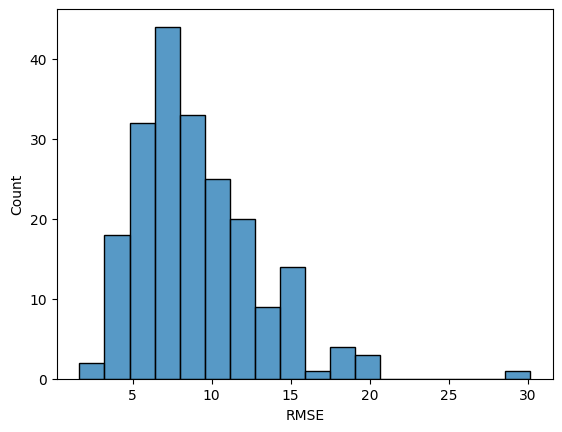

In [206]:
sns.histplot(results_df['RMSE'])

#### Quarter Data

In [ ]:
prophet_df = final_df.copy().groupby(['Group','Product_Class','Quarter','Stock','customer_category'])['Profit_Margin'].mean().reset_index()

In [ ]:
propeht_df_w_cols = prophet_df.groupby(['Group','Product_Class','Stock','customer_category']).agg({'Quarter': 'nunique'}).reset_index()

In [ ]:
propeht_df_w_cols=propeht_df_w_cols[propeht_df_w_cols['Quarter'] == 15]

In [ ]:
valid_pairs = [(row['Group'], row['Product_Class'], row['Stock'], row['customer_category']) for index, row in propeht_df_w_cols.iterrows()]

In [ ]:
valid_df = pd.DataFrame(valid_pairs, columns=['Group', 'Product_Class', 'Stock', 'customer_category'])

In [ ]:
filtered_prophet_df = prophet_df.merge(valid_df, on=['Group', 'Product_Class', 'Stock', 'customer_category'], how='inner')

In [ ]:
filtered_prophet_df['Quarter'] = pd.to_datetime(filtered_prophet_df['Quarter'])

In [ ]:
filtered_prophet_train_df = filtered_prophet_df[filtered_prophet_df['Quarter'].dt.year <2023]

In [ ]:
filtered_prophet_test_df = filtered_prophet_df[filtered_prophet_df['Quarter'].dt.year>=2023]

In [ ]:
filtered_prophet_train_df = filtered_prophet_train_df.rename(columns={"Quarter": "ds","Profit_Margin": "y"})

### Prophet

In [54]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

#### Prophet Model 1

In [52]:
def prophet_model(product):
  df = filtered_prophet_train_df[filtered_prophet_train_df['Product_Class']==product]
  model_prophet = Prophet(interval_width=0.95)
  model_prophet.fit(df)
  ## Cross Validation
  # df_cv = cross_validation(model_prophet, initial='730 days', period='180 days', horizon='365 days')

  df_future = model_prophet.make_future_dataframe(periods=9, freq='MS')
  forecast_prophet = model_prophet.predict(df_future)
  forecast_2023 = forecast_prophet[(forecast_prophet['ds'].dt.year == 2023)]['yhat']
  actual_2023 = filtered_prophet_test_df[filtered_prophet_test_df['Product_Class']==product]['Profit_Margin']
  rmse = np.sqrt(mean_squared_error(forecast_2023, actual_2023))
  return product, rmse


In [ ]:
error_products = []
results_dict = {}
for product in valid_product_list:
    try:
        # Call the prophet_model function for each product
        product, rmse = prophet_model(product)
        results_dict[product] = rmse
    except ValueError as e:
        # If ValueError occurs, store the product name in the error_products list
        error_products.append(product)
        print(f"Error encountered for product: {product}. Error message: {str(e)}")

print("Products encountering errors:", error_products)

In [58]:
result_df = pd.DataFrame(list(results_dict.items()), columns=['Product_Class', 'RMSE'])

In [59]:
pm_result = filtered_prophet_df.groupby(['Product_Class'])['Profit_Margin'].median().reset_index()

In [60]:
result_df.merge(pm_result,how='left')

,Product_Class,RMSE,Profit_Margin
0,ABRCON,10.928995,24.278180
1,ABRFLW,3.013020,28.295527
2,ABRHAN,15.165963,27.772903
3,ABRMAN,5.494563,27.793548
4,ABRMIS,6.874364,25.458972
...,...,...,...
161,WEMGRO,11.449693,21.006104
162,WEMMAR,9.500889,25.608953
163,WEMSTR,7.681202,27.480745
164,WLDDRI,8.206311,21.789786


In [61]:
result_df['RMSE'].mean()

7.155001701987943

#### Adapt to customer and stock category

In [ ]:
def prophet_model2(group, product_class, customer_category, train_df, test_df):
    # Filter based on all four parameters
    df = train_df[(train_df['Group'] == group) &
                  (train_df['Product_Class'] == product_class) &
                  (train_df['customer_category'] == customer_category)]

    if df.empty:
        return (group, product_class, customer_category), np.nan

    model_prophet = Prophet(interval_width=0.95)
    model_prophet.fit(df)

    df_future = model_prophet.make_future_dataframe(periods=9, freq='MS')
    forecast_prophet = model_prophet.predict(df_future)

    forecast_2023 = forecast_prophet[(forecast_prophet['ds'].dt.year == 2023)]['yhat']
    actual_2023 = test_df[(test_df['Group'] == group) &
                          (test_df['Product_Class'] == product_class) &
                          (test_df['customer_category'] == customer_category)]['Profit_Margin']
    print(forecast_2023)
    if actual_2023.empty:
        return (group, product_class, customer_category), np.nan

    rmse = np.sqrt(mean_squared_error(forecast_2023, actual_2023))
    return (group, product_class, customer_category), rmse

In [ ]:
# Assuming 'filtered_prophet_train_df' and 'filtered_prophet_test_df' are predefined
unique_combinations = filtered_prophet_train_df.drop_duplicates(subset=['Group', 'Product_Class', 'customer_category'])

results = []
for _, row in unique_combinations.iterrows():
    result = prophet_model2(row['Group'], row['Product_Class'], row['customer_category'], filtered_prophet_train_df, filtered_prophet_test_df)
    results.append(result)

# 'results' will be a list of tuples, where each tuple contains the combination and its corresponding RMSE
for combination, rmse in results:
    print(f"Combination: {combination}, RMSE: {rmse}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/h78p12lo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/vxfnzj_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81086', 'data', 'file=/tmp/tmps43quqti/h78p12lo.json', 'init=/tmp/tmps43quqti/vxfnzj_j.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelrdtfqzvy/prophet_model-20240329022032.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

36    29.177406
37    18.791001
38    25.453362
39    21.760098
40    14.425686
41    22.526437
42    33.267028
43    23.531961
44    23.052745
Name: yhat, dtype: float64


02:20:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/upvl3y6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/b7qgbpvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57856', 'data', 'file=/tmp/tmps43quqti/upvl3y6w.json', 'init=/tmp/tmps43quqti/b7qgbpvt.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeliwu1jhdi/prophet_model-20240329022033.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.012623
37    25.910747
38    29.540594
39    25.105793
40    30.467060
41    17.902249
42    30.791963
43    22.909064
44    28.965779
Name: yhat, dtype: float64


02:20:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/fpnc64ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/y9woo28p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13000', 'data', 'file=/tmp/tmps43quqti/fpnc64ll.json', 'init=/tmp/tmps43quqti/y9woo28p.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelyv7x85_h/prophet_model-20240329022034.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    37.999044
37    39.990297
38    20.012654
39    32.595769
40    43.099130
41    35.767286
42    35.730706
43    33.891359
44    39.306311
Name: yhat, dtype: float64


02:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/88wr67w_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/bfpnqy3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6539', 'data', 'file=/tmp/tmps43quqti/88wr67w_.json', 'init=/tmp/tmps43quqti/bfpnqy3y.json', 'output', 'file=/tmp/tmps43quqti/prophet_modell3om7ac_/prophet_model-20240329022034.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.610919
37    30.008367
38    27.156482
39    25.632268
40    29.794111
41    21.247181
42    17.737911
43    37.876960
44    33.907751
Name: yhat, dtype: float64


02:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ba6zzp9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/zlivmhbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85613', 'data', 'file=/tmp/tmps43quqti/ba6zzp9i.json', 'init=/tmp/tmps43quqti/zlivmhbi.json', 'output', 'file=/tmp/tmps43quqti/prophet_model1e5bvj7r/prophet_model-20240329022035.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    20.265313
37    19.302966
38    13.165223
39    22.686952
40    13.602599
41    66.736993
42    -9.666647
43    14.919090
44    17.551707
Name: yhat, dtype: float64


02:20:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/j3zlhwp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6kux8m58.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93694', 'data', 'file=/tmp/tmps43quqti/j3zlhwp_.json', 'init=/tmp/tmps43quqti/6kux8m58.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelo20sqyw4/prophet_model-20240329022035.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.007716
37    25.589260
38    19.167896
39    30.563688
40    24.625463
41    22.233757
42    23.832454
43    29.824075
44    22.088838
Name: yhat, dtype: float64


02:20:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/d7snqlak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/b0ai9vuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53197', 'data', 'file=/tmp/tmps43quqti/d7snqlak.json', 'init=/tmp/tmps43quqti/b0ai9vuc.json', 'output', 'file=/tmp/tmps43quqti/prophet_model65lvznx2/prophet_model-20240329022036.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    47.868653
37    41.441380
38    43.779800
39    35.004452
40    47.734726
41    47.417705
42    41.286408
43    51.045101
44    32.829297
Name: yhat, dtype: float64


02:20:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_7gtkgni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/m6d0fgaq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2536', 'data', 'file=/tmp/tmps43quqti/_7gtkgni.json', 'init=/tmp/tmps43quqti/m6d0fgaq.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelht0s4p3g/prophet_model-20240329022036.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:36 - cmdstanpy - INFO - Chain [1] 

36    27.248054
37    33.484563
38    34.240520
39    31.076739
40    32.682171
41    26.004693
42    35.084239
43    22.069225
44    35.439918
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/1v2sq03_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9qynz_0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57705', 'data', 'file=/tmp/tmps43quqti/1v2sq03_.json', 'init=/tmp/tmps43quqti/9qynz_0j.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelo7h7d413/prophet_model-20240329022036.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    34.870206
37    28.989890
38    23.655389
39    30.432428
40    25.930971
41    31.922826
42    36.878889
43    32.987257
44    30.384699
Name: yhat, dtype: float64


02:20:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8p_ctd8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ueo_qtk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48997', 'data', 'file=/tmp/tmps43quqti/8p_ctd8t.json', 'init=/tmp/tmps43quqti/ueo_qtk8.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelyx10p3nw/prophet_model-20240329022037.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.486407
37    29.309167
38    34.875949
39    33.704188
40    29.472013
41    26.975173
42    36.299286
43    30.322651
44    35.014612
Name: yhat, dtype: float64


02:20:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ptobhsvo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/31gq3vde.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18604', 'data', 'file=/tmp/tmps43quqti/ptobhsvo.json', 'init=/tmp/tmps43quqti/31gq3vde.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelpk3wlxkl/prophet_model-20240329022038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    32.165890
37    33.658312
38    33.389043
39    31.598048
40    35.977679
41    44.632607
42    40.367871
43    42.323860
44    35.417685
Name: yhat, dtype: float64


02:20:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/fe_e0vlc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dtwhg8ce.json


36    34.756760
37    42.060706
38    40.608757
39    35.146367
40    27.793641
41    28.326819
42    32.672705
43    76.556153
44    35.302455
Name: yhat, dtype: float64


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70352', 'data', 'file=/tmp/tmps43quqti/fe_e0vlc.json', 'init=/tmp/tmps43quqti/dtwhg8ce.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelyhlurjbx/prophet_model-20240329022040.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ecy5c82c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/s9ep4zge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:r

36    30.872495
37    39.072600
38    38.873859
39    33.953744
40    36.194052
41    31.145537
42    31.579308
43    38.654698
44    40.323740
Name: yhat, dtype: float64


02:20:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/e31him3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/kvl8z0by.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23325', 'data', 'file=/tmp/tmps43quqti/e31him3u.json', 'init=/tmp/tmps43quqti/kvl8z0by.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelbae5x2dm/prophet_model-20240329022041.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.903482
37    26.004999
38    22.300328
39    17.750182
40    36.989829
41    15.229602
42    31.082449
43    31.889024
44    34.315614
Name: yhat, dtype: float64


02:20:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/iceigcbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/na3ob5zh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45145', 'data', 'file=/tmp/tmps43quqti/iceigcbf.json', 'init=/tmp/tmps43quqti/na3ob5zh.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelbfxhxu56/prophet_model-20240329022042.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    22.519366
37    26.153040
38    42.726116
39    18.945669
40    15.549889
41    34.220970
42    32.661396
43    22.150944
44    22.816893
Name: yhat, dtype: float64


02:20:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/wo64mh28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/w56ooqkz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12757', 'data', 'file=/tmp/tmps43quqti/wo64mh28.json', 'init=/tmp/tmps43quqti/w56ooqkz.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeltnnb7v6k/prophet_model-20240329022042.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    32.506561
37    30.959895
38    22.748425
39    36.724646
40    17.739932
41    40.098882
42    26.946929
43    35.214892
44    35.209735
Name: yhat, dtype: float64


02:20:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2n_8n8u0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/14a7mp80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42900', 'data', 'file=/tmp/tmps43quqti/2n_8n8u0.json', 'init=/tmp/tmps43quqti/14a7mp80.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelbymz0sgb/prophet_model-20240329022042.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.698758
37    29.140116
38    30.156009
39    29.696833
40    22.975570
41    30.199532
42    27.686467
43    27.495647
44    28.659793
Name: yhat, dtype: float64


02:20:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/v35ol8yh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_ur_6q17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91105', 'data', 'file=/tmp/tmps43quqti/v35ol8yh.json', 'init=/tmp/tmps43quqti/_ur_6q17.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelwynksi8k/prophet_model-20240329022043.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    33.951607
37    35.764188
38    37.189057
39    34.279168
40    34.943477
41    37.355434
42    33.465268
43    48.917890
44    30.490810
Name: yhat, dtype: float64


02:20:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/f4247_5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/u_7441xe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7462', 'data', 'file=/tmp/tmps43quqti/f4247_5g.json', 'init=/tmp/tmps43quqti/u_7441xe.json', 'output', 'file=/tmp/tmps43quqti/prophet_model9nk6tesn/prophet_model-20240329022043.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.916786
37    36.726756
38    17.942361
39    26.640094
40    42.165661
41    34.349383
42    50.107470
43    33.733360
44    34.682650
Name: yhat, dtype: float64


02:20:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/e83261tz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6ffq_43r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62516', 'data', 'file=/tmp/tmps43quqti/e83261tz.json', 'init=/tmp/tmps43quqti/6ffq_43r.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelwnr73qux/prophet_model-20240329022043.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    33.040201
37    29.177455
38    29.136860
39    29.440736
40    26.689594
41    26.625501
42    41.898429
43    28.313479
44    18.882806
Name: yhat, dtype: float64


02:20:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/xa10zgx_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/lb9wuqn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57934', 'data', 'file=/tmp/tmps43quqti/xa10zgx_.json', 'init=/tmp/tmps43quqti/lb9wuqn5.json', 'output', 'file=/tmp/tmps43quqti/prophet_modely7a01gk5/prophet_model-20240329022044.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    37.302693
37    38.530380
38    31.877108
39    48.026865
40    28.145878
41    47.686898
42    43.369894
43    38.128888
44    29.500621
Name: yhat, dtype: float64


02:20:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/vcjqy92a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/4tdsizy5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44001', 'data', 'file=/tmp/tmps43quqti/vcjqy92a.json', 'init=/tmp/tmps43quqti/4tdsizy5.json', 'output', 'file=/tmp/tmps43quqti/prophet_model150sj5bw/prophet_model-20240329022044.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    45.531809
37    44.473082
38    26.881849
39    21.106123
40    38.038537
41    42.326373
42    63.909279
43    37.018456
44    45.558505
Name: yhat, dtype: float64


02:20:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/yt1hh98b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/cjfvveg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33188', 'data', 'file=/tmp/tmps43quqti/yt1hh98b.json', 'init=/tmp/tmps43quqti/cjfvveg_.json', 'output', 'file=/tmp/tmps43quqti/prophet_modell8hn5b18/prophet_model-20240329022044.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.150822
37    33.975358
38    33.877689
39    42.839574
40    28.894392
41    34.940126
42    36.557891
43    30.221044
44    40.211055
Name: yhat, dtype: float64


02:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/vkhinu95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2xlitzxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22826', 'data', 'file=/tmp/tmps43quqti/vkhinu95.json', 'init=/tmp/tmps43quqti/2xlitzxp.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelyknhnor8/prophet_model-20240329022045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:45 - cmdstanpy - INFO - Chain [1]

36    31.861001
37    31.945688
38    32.449722
39    34.260162
40    38.569751
41    26.005017
42    29.877032
43    41.587262
44    24.992973
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/p7pdz1hh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/t7k5hutk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48355', 'data', 'file=/tmp/tmps43quqti/p7pdz1hh.json', 'init=/tmp/tmps43quqti/t7k5hutk.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelmhte51wu/prophet_model-20240329022045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.163781
37    34.927451
38    29.820812
39    27.791386
40    26.974509
41    25.908501
42    33.749238
43    30.652880
44    20.996151
Name: yhat, dtype: float64


02:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6v3xiq6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2t_f10ae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86759', 'data', 'file=/tmp/tmps43quqti/6v3xiq6l.json', 'init=/tmp/tmps43quqti/2t_f10ae.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelt5yk2x4a/prophet_model-20240329022045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:45 - cmdstanpy - INFO - Chain [1]

36    31.559204
37    32.893683
38    35.164618
39    34.373622
40    27.833162
41    25.106833
42    38.375468
43    32.745708
44    30.661772
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/l64vxgb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/z69yj3w2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37141', 'data', 'file=/tmp/tmps43quqti/l64vxgb7.json', 'init=/tmp/tmps43quqti/z69yj3w2.json', 'output', 'file=/tmp/tmps43quqti/prophet_model05kq67y3/prophet_model-20240329022045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


36    24.861928
37    22.410606
38    28.227255
39    30.834544
40    30.951656
41    24.132884
42    31.620564
43    26.647908
44    24.347648
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/f5cun_9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/e3va41ua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20131', 'data', 'file=/tmp/tmps43quqti/f5cun_9n.json', 'init=/tmp/tmps43quqti/e3va41ua.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelwtlx015_/prophet_model-20240329022046.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    20.608324
37    26.390159
38    14.268887
39    24.565818
40    26.495168
41    23.849312
42    25.496084
43    20.119193
44    19.213239
Name: yhat, dtype: float64


02:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8oxv5l3p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_8_agjv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37632', 'data', 'file=/tmp/tmps43quqti/8oxv5l3p.json', 'init=/tmp/tmps43quqti/_8_agjv4.json', 'output', 'file=/tmp/tmps43quqti/prophet_model0ec44g83/prophet_model-20240329022046.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:46 - cmdstanpy - INFO - Chain [1]

36    21.815287
37    30.209660
38    35.810018
39    20.191132
40    21.575050
41    29.465389
42    22.290501
43    28.223657
44    28.074751
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/1rmhoe6e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3cfwws87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50755', 'data', 'file=/tmp/tmps43quqti/1rmhoe6e.json', 'init=/tmp/tmps43quqti/3cfwws87.json', 'output', 'file=/tmp/tmps43quqti/prophet_model37ujv74l/prophet_model-20240329022046.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    41.631325
37    48.118074
38    34.109339
39     8.647943
40    53.296161
41    61.732218
42    25.895532
43    35.778845
44    49.664575
Name: yhat, dtype: float64


02:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/pydqxukm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/azefpw2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55658', 'data', 'file=/tmp/tmps43quqti/pydqxukm.json', 'init=/tmp/tmps43quqti/azefpw2t.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeljabr8bps/prophet_model-20240329022047.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.234200
37    25.899381
38    18.296631
39    28.039305
40    34.451903
41    26.572164
42    27.256156
43    20.203756
44    17.322347
Name: yhat, dtype: float64


02:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/epp4o4l7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/uq8a22gu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50530', 'data', 'file=/tmp/tmps43quqti/epp4o4l7.json', 'init=/tmp/tmps43quqti/uq8a22gu.json', 'output', 'file=/tmp/tmps43quqti/prophet_model7jii7sbk/prophet_model-20240329022047.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.104575
37    27.286441
38    13.487307
39    32.852376
40    29.537901
41     6.716641
42    25.805249
43    22.353990
44    24.712794
Name: yhat, dtype: float64


02:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/7g41xc6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/lvpltu1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30210', 'data', 'file=/tmp/tmps43quqti/7g41xc6v.json', 'init=/tmp/tmps43quqti/lvpltu1_.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelffa2uy8x/prophet_model-20240329022047.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    34.170427
37    27.193098
38    31.851417
39    55.611809
40    17.612893
41    28.027198
42    23.076600
43    25.647781
44    26.801917
Name: yhat, dtype: float64


02:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/5bomgy0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/gdhksjg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10401', 'data', 'file=/tmp/tmps43quqti/5bomgy0w.json', 'init=/tmp/tmps43quqti/gdhksjg_.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelg4h7bi6s/prophet_model-20240329022048.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.465542
37    26.630791
38    28.208064
39    22.385010
40    24.230220
41    31.072399
42    36.495777
43    26.699256
44    29.207638
Name: yhat, dtype: float64


02:20:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/d5nwm78x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/reqfurj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88403', 'data', 'file=/tmp/tmps43quqti/d5nwm78x.json', 'init=/tmp/tmps43quqti/reqfurj6.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelsgxzvd86/prophet_model-20240329022048.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    33.335860
37    31.791354
38    38.050098
39    26.555983
40    39.515993
41    35.644410
42    41.467573
43    30.680792
44    38.457213
Name: yhat, dtype: float64


02:20:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/lqpedx6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/mw7txihe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59954', 'data', 'file=/tmp/tmps43quqti/lqpedx6f.json', 'init=/tmp/tmps43quqti/mw7txihe.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelpz3r_6fa/prophet_model-20240329022048.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    26.234958
37    25.433109
38    27.694550
39    27.827165
40    30.493876
41    19.426515
42    27.201856
43    25.652287
44    29.710555
Name: yhat, dtype: float64


02:20:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/quhypgi3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/fsdbrbh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19807', 'data', 'file=/tmp/tmps43quqti/quhypgi3.json', 'init=/tmp/tmps43quqti/fsdbrbh6.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelgsjp_f4v/prophet_model-20240329022049.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    39.453721
37    49.865197
38    30.643324
39    33.982440
40    24.301610
41    35.791158
42    21.628949
43    75.886306
44    28.459142
Name: yhat, dtype: float64


02:20:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/eqakv3ja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0jvzuyb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75651', 'data', 'file=/tmp/tmps43quqti/eqakv3ja.json', 'init=/tmp/tmps43quqti/0jvzuyb0.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelw5y1qqb8/prophet_model-20240329022049.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    34.071808
37    33.696407
38    34.567584
39    53.007919
40    20.620545
41    26.084291
42    36.904980
43    34.315808
44    41.652499
Name: yhat, dtype: float64


02:20:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3bxg75qh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0ikhkjey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49522', 'data', 'file=/tmp/tmps43quqti/3bxg75qh.json', 'init=/tmp/tmps43quqti/0ikhkjey.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeldr1mpbt_/prophet_model-20240329022049.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:49 - cmdstanpy - INFO - Chain [1]

36    33.765069
37    33.018435
38    34.483179
39    38.675668
40    31.870019
41    27.338608
42    33.705239
43    54.158969
44    41.603232
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3hex5865.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/xdodsnwx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67072', 'data', 'file=/tmp/tmps43quqti/3hex5865.json', 'init=/tmp/tmps43quqti/xdodsnwx.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelhjgeiiwv/prophet_model-20240329022050.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.501174
37    24.367097
38    27.187497
39    26.123765
40    30.931337
41    32.366846
42    29.935424
43    23.002907
44    27.287117
Name: yhat, dtype: float64


02:20:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/zcno_0p1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0jhv8cu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28495', 'data', 'file=/tmp/tmps43quqti/zcno_0p1.json', 'init=/tmp/tmps43quqti/0jhv8cu2.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelkuz3jz6y/prophet_model-20240329022050.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.873905
37    28.897841
38    30.109462
39    34.459800
40    22.320323
41    31.353044
42    26.089540
43    26.999809
44    34.634170
Name: yhat, dtype: float64


02:20:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3escuc0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/h18m0pz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70445', 'data', 'file=/tmp/tmps43quqti/3escuc0y.json', 'init=/tmp/tmps43quqti/h18m0pz0.json', 'output', 'file=/tmp/tmps43quqti/prophet_model3i3g7mwq/prophet_model-20240329022050.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    32.407978
37    34.303101
38    30.540052
39    34.764309
40    28.264205
41    36.834564
42    25.390285
43    42.656285
44    29.745956
Name: yhat, dtype: float64


02:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/7ik83n_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/1pkrfx3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77468', 'data', 'file=/tmp/tmps43quqti/7ik83n_d.json', 'init=/tmp/tmps43quqti/1pkrfx3_.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelusadciqk/prophet_model-20240329022051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    16.261413
37    23.079240
38    43.631476
39    35.435882
40    28.943285
41    23.275375
42    25.980012
43    24.368624
44    42.149963
Name: yhat, dtype: float64


02:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/x4awfvke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ki57j0be.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24722', 'data', 'file=/tmp/tmps43quqti/x4awfvke.json', 'init=/tmp/tmps43quqti/ki57j0be.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelg0kx83c4/prophet_model-20240329022051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.138547
37    30.288068
38    20.833354
39    35.681469
40    40.045614
41    27.515113
42    27.328946
43    32.519673
44    40.028487
Name: yhat, dtype: float64


02:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/qb7gqc5p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/bflzem7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27492', 'data', 'file=/tmp/tmps43quqti/qb7gqc5p.json', 'init=/tmp/tmps43quqti/bflzem7a.json', 'output', 'file=/tmp/tmps43quqti/prophet_model3okkz0hu/prophet_model-20240329022051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.869522
37    30.672998
38    30.085935
39    29.544575
40    24.990308
41    29.994121
42    23.855656
43    42.281565
44    32.869194
Name: yhat, dtype: float64


02:20:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/cng08_8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/legtf_93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27725', 'data', 'file=/tmp/tmps43quqti/cng08_8q.json', 'init=/tmp/tmps43quqti/legtf_93.json', 'output', 'file=/tmp/tmps43quqti/prophet_model6eswbuyw/prophet_model-20240329022052.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.223265
37    23.172215
38    19.518383
39    27.824342
40    42.230008
41    31.191179
42    30.120027
43    23.227477
44    18.892956
Name: yhat, dtype: float64


02:20:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/d99jy1uy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3d5s6lp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10697', 'data', 'file=/tmp/tmps43quqti/d99jy1uy.json', 'init=/tmp/tmps43quqti/3d5s6lp7.json', 'output', 'file=/tmp/tmps43quqti/prophet_model6whxhuzt/prophet_model-20240329022052.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    26.627819
37    25.725211
38    52.113824
39    22.631217
40    23.109798
41    35.048908
42    24.230820
43    29.595243
44    51.415576
Name: yhat, dtype: float64


02:20:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/olnbaoap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/5deg6j6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52823', 'data', 'file=/tmp/tmps43quqti/olnbaoap.json', 'init=/tmp/tmps43quqti/5deg6j6a.json', 'output', 'file=/tmp/tmps43quqti/prophet_model9cjsne78/prophet_model-20240329022052.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    11.001875
37    26.808298
38    21.382369
39    27.559798
40    24.655623
41    21.381346
42    22.362543
43    16.035371
44    39.295551
Name: yhat, dtype: float64


02:20:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0yn1gzo6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/v5m1vw9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25546', 'data', 'file=/tmp/tmps43quqti/0yn1gzo6.json', 'init=/tmp/tmps43quqti/v5m1vw9o.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeltbgqjmkn/prophet_model-20240329022053.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.255678
37    31.559487
38    33.153874
39    26.153246
40    22.139063
41    46.194602
42    43.368984
43    20.547676
44    39.739100
Name: yhat, dtype: float64


02:20:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/r05_pneg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/xk0scjzs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84991', 'data', 'file=/tmp/tmps43quqti/r05_pneg.json', 'init=/tmp/tmps43quqti/xk0scjzs.json', 'output', 'file=/tmp/tmps43quqti/prophet_modellojcwu8q/prophet_model-20240329022053.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.564110
37    24.872416
38    26.742938
39    23.380989
40    39.122315
41    12.604364
42    49.240771
43    30.029429
44    23.903843
Name: yhat, dtype: float64


02:20:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/nh2hqrb6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/4k6v3j6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80387', 'data', 'file=/tmp/tmps43quqti/nh2hqrb6.json', 'init=/tmp/tmps43quqti/4k6v3j6n.json', 'output', 'file=/tmp/tmps43quqti/prophet_modell1z139gm/prophet_model-20240329022054.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.032862
37    22.848091
38    26.298521
39    34.617750
40    35.569308
41    28.452925
42     6.965436
43    24.977913
44    29.800683
Name: yhat, dtype: float64


02:20:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/o429o2oc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6ziibdr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62590', 'data', 'file=/tmp/tmps43quqti/o429o2oc.json', 'init=/tmp/tmps43quqti/6ziibdr7.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelswx5mejf/prophet_model-20240329022054.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.060492
37    28.278839
38    21.803317
39    22.329676
40    28.370393
41    35.546667
42    32.433394
43    32.019310
44    20.785736
Name: yhat, dtype: float64


02:20:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/z57buwb5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/yz13xye3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82040', 'data', 'file=/tmp/tmps43quqti/z57buwb5.json', 'init=/tmp/tmps43quqti/yz13xye3.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelc3m5hbw8/prophet_model-20240329022055.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    15.638488
37    21.409163
38    25.478163
39    20.759525
40    22.594842
41    25.014424
42    27.965197
43    19.096244
44    19.127205
Name: yhat, dtype: float64


02:20:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/wm73ejeo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/y14vx0hf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40873', 'data', 'file=/tmp/tmps43quqti/wm73ejeo.json', 'init=/tmp/tmps43quqti/y14vx0hf.json', 'output', 'file=/tmp/tmps43quqti/prophet_modellw7q1ygx/prophet_model-20240329022055.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.708334
37    24.406167
38    18.343468
39    24.687557
40    37.517435
41    22.819216
42    19.252912
43    18.555320
44    22.816861
Name: yhat, dtype: float64


02:20:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/qzxw794m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/e5vpwzxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26073', 'data', 'file=/tmp/tmps43quqti/qzxw794m.json', 'init=/tmp/tmps43quqti/e5vpwzxq.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelf_iml8wm/prophet_model-20240329022056.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    23.082794
37    31.608749
38    15.400985
39    25.948949
40    21.280536
41    32.217101
42    26.953325
43    12.188711
44    24.730023
Name: yhat, dtype: float64


02:20:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/bsxu83n3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/og9mwpza.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44195', 'data', 'file=/tmp/tmps43quqti/bsxu83n3.json', 'init=/tmp/tmps43quqti/og9mwpza.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelrm2bw41q/prophet_model-20240329022056.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.299345
37    27.277646
38    25.887931
39    33.956658
40    30.455442
41    25.430529
42    26.327078
43    34.476483
44    25.205469
Name: yhat, dtype: float64


02:20:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/cdddw1av.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dg_u0vfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55514', 'data', 'file=/tmp/tmps43quqti/cdddw1av.json', 'init=/tmp/tmps43quqti/dg_u0vfv.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelwzumnh4z/prophet_model-20240329022056.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.433064
37    21.425370
38    17.336370
39    16.351205
40    15.954664
41    47.349716
42    -4.625417
43    27.351820
44    27.629699
Name: yhat, dtype: float64


02:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/y3ym46gm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6kvm01ht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65114', 'data', 'file=/tmp/tmps43quqti/y3ym46gm.json', 'init=/tmp/tmps43quqti/6kvm01ht.json', 'output', 'file=/tmp/tmps43quqti/prophet_model8o8p4bzq/prophet_model-20240329022057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    33.715266
37    35.898182
38    33.333341
39    37.259426
40    40.784004
41    26.347179
42    32.959701
43    59.142980
44    30.321122
Name: yhat, dtype: float64


02:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/xsh5sydr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dryzb722.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6997', 'data', 'file=/tmp/tmps43quqti/xsh5sydr.json', 'init=/tmp/tmps43quqti/dryzb722.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelxwv00x0d/prophet_model-20240329022057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    18.914744
37    20.288330
38    21.376363
39    18.451434
40    16.601261
41    13.805296
42    31.030004
43    23.901718
44    10.467624
Name: yhat, dtype: float64


02:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/327v07dl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/tlyrvm5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67096', 'data', 'file=/tmp/tmps43quqti/327v07dl.json', 'init=/tmp/tmps43quqti/tlyrvm5e.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelylyyd3n6/prophet_model-20240329022058.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:58 - cmdstanpy - INFO - Chain [1]

36    19.906606
37    21.589505
38    28.218569
39    20.673449
40    14.655281
41    14.638837
42    29.612017
43    25.583738
44    31.891188
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ez4l7tfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/w6x4vgrz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15236', 'data', 'file=/tmp/tmps43quqti/ez4l7tfp.json', 'init=/tmp/tmps43quqti/w6x4vgrz.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelg2s8u1dy/prophet_model-20240329022058.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.664343
37    22.893637
38    23.311928
39    17.030052
40    16.093962
41    24.783540
42    15.684831
43    21.891202
44    19.272363
Name: yhat, dtype: float64


02:20:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/q2v2f_o4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/g_zlj_01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97927', 'data', 'file=/tmp/tmps43quqti/q2v2f_o4.json', 'init=/tmp/tmps43quqti/g_zlj_01.json', 'output', 'file=/tmp/tmps43quqti/prophet_model1c8kacsu/prophet_model-20240329022058.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:58 - cmdstanpy - INFO - Chain [1]

36    18.026640
37    23.608903
38    22.713432
39    29.182309
40    25.243217
41    27.816333
42    15.812140
43    26.764598
44    24.529844
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/57u75ycq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/i1sn6d8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49698', 'data', 'file=/tmp/tmps43quqti/57u75ycq.json', 'init=/tmp/tmps43quqti/i1sn6d8f.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelbxaukjhe/prophet_model-20240329022058.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.882441
37    25.490591
38    22.463967
39    30.094811
40    28.854473
41    22.332193
42    20.277226
43    25.268613
44    22.272633
Name: yhat, dtype: float64


02:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/66n1lxf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/65n8ivv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74285', 'data', 'file=/tmp/tmps43quqti/66n1lxf1.json', 'init=/tmp/tmps43quqti/65n8ivv5.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelitz5l__t/prophet_model-20240329022059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.297399
37    34.344509
38    26.554495
39    33.960811
40    36.218687
41    35.766320
42    28.566547
43    48.441988
44    27.317878
Name: yhat, dtype: float64


02:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dfy8nnr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/edsh3ufv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93872', 'data', 'file=/tmp/tmps43quqti/dfy8nnr1.json', 'init=/tmp/tmps43quqti/edsh3ufv.json', 'output', 'file=/tmp/tmps43quqti/prophet_model_ruj5pil/prophet_model-20240329022059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    15.845032
37    20.584348
38    24.577006
39    15.294090
40    17.890893
41    14.692374
42    22.184835
43    21.896132
44    19.719269
Name: yhat, dtype: float64


02:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9prr7bnm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9vd200vw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31773', 'data', 'file=/tmp/tmps43quqti/9prr7bnm.json', 'init=/tmp/tmps43quqti/9vd200vw.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeliq5lcnc0/prophet_model-20240329022059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    14.068878
37    18.161041
38    27.998100
39    30.932319
40    16.059796
41    17.122404
42    19.180886
43    19.158687
44    13.725971
Name: yhat, dtype: float64


02:21:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/7rzos790.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/bbqxpbr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86794', 'data', 'file=/tmp/tmps43quqti/7rzos790.json', 'init=/tmp/tmps43quqti/bbqxpbr7.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelpb8bhn_m/prophet_model-20240329022100.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    24.704650
37    34.124753
38    17.845318
39    41.392229
40    21.928225
41    34.012157
42    15.328769
43    23.161136
44    17.808033
Name: yhat, dtype: float64


02:21:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jpb6vlcl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/tgk452w5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61631', 'data', 'file=/tmp/tmps43quqti/jpb6vlcl.json', 'init=/tmp/tmps43quqti/tgk452w5.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelbzjolanw/prophet_model-20240329022100.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.583634
37    23.159721
38    22.016717
39    23.780360
40    25.344656
41    27.438014
42    26.988639
43    27.797700
44    22.314164
Name: yhat, dtype: float64


02:21:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9vhmpwvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/k23p8dit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50388', 'data', 'file=/tmp/tmps43quqti/9vhmpwvr.json', 'init=/tmp/tmps43quqti/k23p8dit.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelu4qvm7zh/prophet_model-20240329022100.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.515605
37    20.850717
38    19.982241
39    16.879260
40    21.321169
41    14.812931
42    28.191325
43    24.294119
44    16.902430
Name: yhat, dtype: float64


02:21:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6zezzegx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/lfye85cr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50907', 'data', 'file=/tmp/tmps43quqti/6zezzegx.json', 'init=/tmp/tmps43quqti/lfye85cr.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelr5oprjv2/prophet_model-20240329022101.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.015637
37    22.559888
38    25.736159
39    19.253301
40    21.855806
41    17.885688
42    23.430036
43    16.909395
44    20.367707
Name: yhat, dtype: float64


02:21:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/eoxqs_28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/vil5yuxh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37867', 'data', 'file=/tmp/tmps43quqti/eoxqs_28.json', 'init=/tmp/tmps43quqti/vil5yuxh.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelzo9kupry/prophet_model-20240329022101.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    40.573224
37    32.339775
38    28.460180
39    33.592436
40    26.294885
41    39.054639
42    45.152425
43    23.251948
44    21.809775
Name: yhat, dtype: float64


02:21:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/86fr7pu4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8ymgtal0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11267', 'data', 'file=/tmp/tmps43quqti/86fr7pu4.json', 'init=/tmp/tmps43quqti/8ymgtal0.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelmpre3jcl/prophet_model-20240329022101.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    32.837940
37    34.858179
38    20.133405
39    45.034931
40    26.121105
41    24.113430
42    47.778263
43    34.737402
44    37.717957
Name: yhat, dtype: float64


02:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dnzsg9jp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/c9qzv6v9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22314', 'data', 'file=/tmp/tmps43quqti/dnzsg9jp.json', 'init=/tmp/tmps43quqti/c9qzv6v9.json', 'output', 'file=/tmp/tmps43quqti/prophet_model470vni89/prophet_model-20240329022102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36     8.335802
37    17.421601
38    20.848270
39    17.861857
40    16.905089
41    10.223088
42     6.831435
43    20.294461
44    15.636546
Name: yhat, dtype: float64


02:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2tfwjrpi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6rc9rs3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90855', 'data', 'file=/tmp/tmps43quqti/2tfwjrpi.json', 'init=/tmp/tmps43quqti/6rc9rs3w.json', 'output', 'file=/tmp/tmps43quqti/prophet_model1m6t4qbz/prophet_model-20240329022102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    24.257680
37    21.296003
38    21.525141
39    17.317306
40    15.410452
41    23.040472
42    28.015245
43    23.916538
44    23.842131
Name: yhat, dtype: float64


02:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0ebiupo3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/tx3pzjl5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32167', 'data', 'file=/tmp/tmps43quqti/0ebiupo3.json', 'init=/tmp/tmps43quqti/tx3pzjl5.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeln2wvlgbs/prophet_model-20240329022102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    35.133474
37    31.898796
38    25.762638
39    26.597221
40    33.723134
41    35.825502
42    33.118770
43    38.444610
44    32.716308
Name: yhat, dtype: float64


02:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jl_pl75u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6gzc552f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28293', 'data', 'file=/tmp/tmps43quqti/jl_pl75u.json', 'init=/tmp/tmps43quqti/6gzc552f.json', 'output', 'file=/tmp/tmps43quqti/prophet_model4n4addba/prophet_model-20240329022103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    13.736008
37    28.494406
38    20.315774
39    24.916442
40    24.138528
41    19.787632
42    24.231512
43    29.001056
44    24.405201
Name: yhat, dtype: float64


02:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2q224rox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/rvisi20u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64230', 'data', 'file=/tmp/tmps43quqti/2q224rox.json', 'init=/tmp/tmps43quqti/rvisi20u.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeldq5c9s08/prophet_model-20240329022103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.896043
37    37.846104
38    22.109234
39    53.089769
40    20.771805
41    33.654494
42    41.440618
43    34.739809
44    29.568963
Name: yhat, dtype: float64


02:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/j5i_2n42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9ux778mo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82164', 'data', 'file=/tmp/tmps43quqti/j5i_2n42.json', 'init=/tmp/tmps43quqti/9ux778mo.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelxhcoo9th/prophet_model-20240329022103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36     8.048454
37     8.729199
38    17.542599
39    21.468488
40     5.135869
41     9.893216
42    16.091159
43    16.071336
44    17.757829
Name: yhat, dtype: float64


02:21:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/nv218zu2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/1qi4ncp3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3776', 'data', 'file=/tmp/tmps43quqti/nv218zu2.json', 'init=/tmp/tmps43quqti/1qi4ncp3.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeldmb5aubx/prophet_model-20240329022104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.329537
37    33.606170
38    11.379369
39    16.394081
40    48.461660
41    30.357472
42    22.071359
43    33.595712
44    33.334052
Name: yhat, dtype: float64


02:21:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/kqqhzvc_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9j_lqzpr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44960', 'data', 'file=/tmp/tmps43quqti/kqqhzvc_.json', 'init=/tmp/tmps43quqti/9j_lqzpr.json', 'output', 'file=/tmp/tmps43quqti/prophet_model5u7xhihg/prophet_model-20240329022104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.526515
37    30.331913
38    40.942451
39    28.472209
40    24.366419
41    25.240125
42    33.401421
43    24.941275
44    30.962919
Name: yhat, dtype: float64


02:21:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8zqldxe1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/itpak5ru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90893', 'data', 'file=/tmp/tmps43quqti/8zqldxe1.json', 'init=/tmp/tmps43quqti/itpak5ru.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeldkmb4eww/prophet_model-20240329022104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.059540
37    23.159966
38    35.422724
39    27.882568
40    42.620478
41    35.810341
42    45.789160
43    40.507608
44    34.429923
Name: yhat, dtype: float64


02:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/bml42zrq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2d7k7d7x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84154', 'data', 'file=/tmp/tmps43quqti/bml42zrq.json', 'init=/tmp/tmps43quqti/2d7k7d7x.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelwtc5d7hz/prophet_model-20240329022105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.966261
37    35.346372
38    22.259105
39    28.830947
40    23.532626
41    28.630161
42    33.410752
43    45.925988
44    28.228949
Name: yhat, dtype: float64


02:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/zl15jav0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/33ejsqe3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88807', 'data', 'file=/tmp/tmps43quqti/zl15jav0.json', 'init=/tmp/tmps43quqti/33ejsqe3.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeljeocsi46/prophet_model-20240329022105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    35.916977
37    39.695988
38    28.531717
39    47.709342
40    40.603422
41    32.575349
42    43.105153
43    49.332625
44    28.441817
Name: yhat, dtype: float64


02:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/mm0ehbii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/i5vz0sbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32368', 'data', 'file=/tmp/tmps43quqti/mm0ehbii.json', 'init=/tmp/tmps43quqti/i5vz0sbe.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelheek_ust/prophet_model-20240329022105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.535301
37    35.077282
38    23.160500
39    24.747513
40    39.517679
41    38.436184
42    37.936048
43    38.848200
44    31.399690
Name: yhat, dtype: float64


02:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/pvx5po69.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/lmfq8pi8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45788', 'data', 'file=/tmp/tmps43quqti/pvx5po69.json', 'init=/tmp/tmps43quqti/lmfq8pi8.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelnyj4crmo/prophet_model-20240329022106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.547459
37    24.867570
38    28.196994
39    26.035344
40    22.240320
41    23.261873
42    30.761590
43    31.925622
44    15.980196
Name: yhat, dtype: float64


02:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/k3c33an2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/951gwr3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37153', 'data', 'file=/tmp/tmps43quqti/k3c33an2.json', 'init=/tmp/tmps43quqti/951gwr3a.json', 'output', 'file=/tmp/tmps43quqti/prophet_model9yfoiamc/prophet_model-20240329022106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    41.229055
37    47.084351
38    51.324662
39    48.738655
40    41.018548
41    39.248959
42    37.544852
43    62.786177
44    55.467544
Name: yhat, dtype: float64


02:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/u5zxncq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/fyv3_8vx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40218', 'data', 'file=/tmp/tmps43quqti/u5zxncq6.json', 'init=/tmp/tmps43quqti/fyv3_8vx.json', 'output', 'file=/tmp/tmps43quqti/prophet_model3jhedrhr/prophet_model-20240329022106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    19.178295
37    23.851972
38    18.299460
39    18.427774
40    37.381857
41    20.337404
42    13.995554
43    29.634453
44    26.999341
Name: yhat, dtype: float64


02:21:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/zrzjxoch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/hc8yxtn6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43813', 'data', 'file=/tmp/tmps43quqti/zrzjxoch.json', 'init=/tmp/tmps43quqti/hc8yxtn6.json', 'output', 'file=/tmp/tmps43quqti/prophet_model4nqdwoxn/prophet_model-20240329022107.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.276935
37    36.759875
38    29.765036
39    33.821511
40    16.849014
41    34.778989
42    50.375656
43    27.492924
44    30.821705
Name: yhat, dtype: float64


02:21:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jpcz405_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/yc94mano.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88266', 'data', 'file=/tmp/tmps43quqti/jpcz405_.json', 'init=/tmp/tmps43quqti/yc94mano.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeln5zeh992/prophet_model-20240329022107.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    12.065985
37    11.571389
38    13.057441
39    14.464059
40    20.317717
41    16.294342
42     6.703820
43    19.618332
44    14.887090
Name: yhat, dtype: float64


02:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dr9ojs51.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/qjfbjfw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27870', 'data', 'file=/tmp/tmps43quqti/dr9ojs51.json', 'init=/tmp/tmps43quqti/qjfbjfw_.json', 'output', 'file=/tmp/tmps43quqti/prophet_model3fr_12sq/prophet_model-20240329022108.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    15.822645
37    25.462348
38    13.118473
39    16.758030
40    17.499892
41    17.841272
42    20.276993
43    25.756361
44    18.313171
Name: yhat, dtype: float64


02:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0b35_44j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/aba0uirz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77854', 'data', 'file=/tmp/tmps43quqti/0b35_44j.json', 'init=/tmp/tmps43quqti/aba0uirz.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelriovg1_r/prophet_model-20240329022108.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    15.949005
37    21.643358
38    10.504279
39    45.975855
40    15.576674
41    17.041799
42    17.549149
43    24.097667
44    19.904218
Name: yhat, dtype: float64


02:21:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/egepmvo_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6278a8vs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1899', 'data', 'file=/tmp/tmps43quqti/egepmvo_.json', 'init=/tmp/tmps43quqti/6278a8vs.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelmn4mflim/prophet_model-20240329022109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    18.889125
37    22.319756
38    18.636492
39    24.808985
40    20.875703
41    18.770362
42    14.580890
43    24.487416
44    21.491846
Name: yhat, dtype: float64


02:21:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/isar98o3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ac_ztzha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66300', 'data', 'file=/tmp/tmps43quqti/isar98o3.json', 'init=/tmp/tmps43quqti/ac_ztzha.json', 'output', 'file=/tmp/tmps43quqti/prophet_model25dk_rsd/prophet_model-20240329022109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.933754
37    23.055998
38     3.356240
39    30.627355
40    31.583726
41    12.976457
42    11.098486
43    20.462105
44    20.545710
Name: yhat, dtype: float64


02:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2uwbo7q4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/od_r7kf9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99178', 'data', 'file=/tmp/tmps43quqti/2uwbo7q4.json', 'init=/tmp/tmps43quqti/od_r7kf9.json', 'output', 'file=/tmp/tmps43quqti/prophet_modellx1ylp3t/prophet_model-20240329022110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    23.316082
37    20.990357
38    33.720203
39    42.843937
40    28.033888
41    10.704761
42    30.882239
43    25.766427
44    46.234452
Name: yhat, dtype: float64


02:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/fdr8ucz3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/70dup1zx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26792', 'data', 'file=/tmp/tmps43quqti/fdr8ucz3.json', 'init=/tmp/tmps43quqti/70dup1zx.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelc2pn19zp/prophet_model-20240329022110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    41.145923
37    43.120851
38    20.320544
39    21.071715
40    38.869019
41    38.963632
42    51.924824
43    36.621449
44    29.836030
Name: yhat, dtype: float64


02:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/g_3lqyja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/pjbccymz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65755', 'data', 'file=/tmp/tmps43quqti/g_3lqyja.json', 'init=/tmp/tmps43quqti/pjbccymz.json', 'output', 'file=/tmp/tmps43quqti/prophet_model0_0vg5wb/prophet_model-20240329022111.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.014715
37    30.090021
38     9.907381
39    27.314841
40    40.075653
41    31.517149
42    38.723578
43    25.970850
44    31.335151
Name: yhat, dtype: float64


02:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/m81og0rb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jtvynifz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26231', 'data', 'file=/tmp/tmps43quqti/m81og0rb.json', 'init=/tmp/tmps43quqti/jtvynifz.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelf09ja6ks/prophet_model-20240329022111.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    23.703622
37    32.621008
38    31.661626
39    20.934218
40    24.594036
41    31.937448
42    30.776526
43    35.205575
44    30.347600
Name: yhat, dtype: float64


02:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/5otfht4h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jhpxqphj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63725', 'data', 'file=/tmp/tmps43quqti/5otfht4h.json', 'init=/tmp/tmps43quqti/jhpxqphj.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelgoat9raq/prophet_model-20240329022111.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.298126
37    25.521385
38    25.813900
39    25.675624
40    24.495342
41    27.248549
42    30.522230
43    22.231896
44    25.525816
Name: yhat, dtype: float64


02:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/mre3n1k3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/pbabt466.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87351', 'data', 'file=/tmp/tmps43quqti/mre3n1k3.json', 'init=/tmp/tmps43quqti/pbabt466.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelgs336154/prophet_model-20240329022112.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.330525
37    31.025082
38    34.385393
39    29.578255
40    35.942322
41    33.681108
42    38.116559
43    15.561649
44    39.576220
Name: yhat, dtype: float64


02:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/385wfzd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/55dn40i2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19554', 'data', 'file=/tmp/tmps43quqti/385wfzd9.json', 'init=/tmp/tmps43quqti/55dn40i2.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelcnnezc45/prophet_model-20240329022112.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.511020
37    29.424314
38    12.055288
39    28.224459
40    37.794836
41    28.343094
42    31.827688
43    24.847267
44    23.815882
Name: yhat, dtype: float64


02:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/eihuhiv6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/qz1rwatp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87472', 'data', 'file=/tmp/tmps43quqti/eihuhiv6.json', 'init=/tmp/tmps43quqti/qz1rwatp.json', 'output', 'file=/tmp/tmps43quqti/prophet_model9452vami/prophet_model-20240329022112.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.099273
37    41.609689
38    33.387493
39    40.786306
40    34.511099
41    39.278650
42    38.435439
43    34.274564
44    36.417753
Name: yhat, dtype: float64


02:21:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/lkkur4qv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/nnnh1gum.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40321', 'data', 'file=/tmp/tmps43quqti/lkkur4qv.json', 'init=/tmp/tmps43quqti/nnnh1gum.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelb__8xsqd/prophet_model-20240329022113.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    48.240157
37    50.085448
38    53.164957
39    24.093533
40    55.351388
41    38.895272
42    66.046422
43    44.384998
44    43.023340
Name: yhat, dtype: float64


02:21:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/gn73hz8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/wuawyvh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13902', 'data', 'file=/tmp/tmps43quqti/gn73hz8n.json', 'init=/tmp/tmps43quqti/wuawyvh3.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelu2u7xw8o/prophet_model-20240329022113.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.728009
37    36.642976
38    20.753621
39    28.282736
40    29.181956
41    31.500136
42    36.633792
43    38.868581
44    35.997093
Name: yhat, dtype: float64


02:21:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/y7ra2e2a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dvjengg1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56716', 'data', 'file=/tmp/tmps43quqti/y7ra2e2a.json', 'init=/tmp/tmps43quqti/dvjengg1.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelet43qayp/prophet_model-20240329022114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.802441
37    31.651765
38    31.920907
39    29.502028
40    31.491750
41    33.787682
42    34.045334
43    35.407473
44    33.046935
Name: yhat, dtype: float64


02:21:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/bwq6c7b9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8kjnz84a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93169', 'data', 'file=/tmp/tmps43quqti/bwq6c7b9.json', 'init=/tmp/tmps43quqti/8kjnz84a.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelwv_7c_pk/prophet_model-20240329022114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    34.503052
37    38.250826
38    38.495271
39    36.941084
40    42.108205
41    33.810087
42    41.550021
43    42.349613
44    44.091897
Name: yhat, dtype: float64


02:21:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ncas98jz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/y4ug4e9p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94408', 'data', 'file=/tmp/tmps43quqti/ncas98jz.json', 'init=/tmp/tmps43quqti/y4ug4e9p.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelf31zp5bw/prophet_model-20240329022114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:14 - cmdstanpy - INFO - Chain [1]

36    18.426747
37    17.033856
38    27.826710
39    19.079280
40    16.476698
41    16.321963
42    16.744670
43    22.380477
44    22.121615
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/n22oadql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0qqdrykj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95806', 'data', 'file=/tmp/tmps43quqti/n22oadql.json', 'init=/tmp/tmps43quqti/0qqdrykj.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelh4k7hl9k/prophet_model-20240329022114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    26.985624
37    32.432474
38    23.185293
39    29.281251
40    27.170383
41    29.772095
42    19.483522
43    28.051761
44    40.772536
Name: yhat, dtype: float64


02:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/4gky56it.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/4k1wvu37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55815', 'data', 'file=/tmp/tmps43quqti/4gky56it.json', 'init=/tmp/tmps43quqti/4k1wvu37.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelmw0fbfbg/prophet_model-20240329022115.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.419724
37    23.363481
38    28.852623
39    29.585310
40    26.388324
41    23.458518
42    28.788032
43    33.962261
44    26.795037
Name: yhat, dtype: float64


02:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9ufab0y8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/4meom4l2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36292', 'data', 'file=/tmp/tmps43quqti/9ufab0y8.json', 'init=/tmp/tmps43quqti/4meom4l2.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelyo0i0f6d/prophet_model-20240329022116.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    44.436396
37    40.838990
38    35.552277
39    40.231267
40    43.092332
41    36.027093
42    63.526211
43    41.348548
44    33.224556
Name: yhat, dtype: float64


02:21:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/y1nx3sud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/p4xnpwss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86866', 'data', 'file=/tmp/tmps43quqti/y1nx3sud.json', 'init=/tmp/tmps43quqti/p4xnpwss.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelohfs9pa5/prophet_model-20240329022116.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.497149
37    20.442384
38    23.528979
39    13.503835
40    18.405646
41    22.396272
42    30.769970
43    23.703298
44     7.718797
Name: yhat, dtype: float64


02:21:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/f9lu95om.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0tlafuia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62232', 'data', 'file=/tmp/tmps43quqti/f9lu95om.json', 'init=/tmp/tmps43quqti/0tlafuia.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelld4v8389/prophet_model-20240329022117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.401295
37    22.402737
38    28.585901
39    17.957435
40    19.208162
41    23.307879
42    19.119621
43    24.663361
44    20.831025
Name: yhat, dtype: float64


02:21:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/v7a5xedl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/y8vb8ke5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72419', 'data', 'file=/tmp/tmps43quqti/v7a5xedl.json', 'init=/tmp/tmps43quqti/y8vb8ke5.json', 'output', 'file=/tmp/tmps43quqti/prophet_model630m7go8/prophet_model-20240329022117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    39.205575
37    39.116744
38    43.315239
39    24.246815
40    34.160201
41    49.125020
42    24.901529
43    31.333988
44    42.888882
Name: yhat, dtype: float64


02:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/in4ed2ko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_yd75a4j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43864', 'data', 'file=/tmp/tmps43quqti/in4ed2ko.json', 'init=/tmp/tmps43quqti/_yd75a4j.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelhki0osf3/prophet_model-20240329022118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.192121
37    23.184803
38    23.410826
39    19.795502
40    18.262044
41    22.226552
42    13.059253
43    39.598474
44    22.423618
Name: yhat, dtype: float64


02:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ewtk6p8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ethe9ix2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28135', 'data', 'file=/tmp/tmps43quqti/ewtk6p8a.json', 'init=/tmp/tmps43quqti/ethe9ix2.json', 'output', 'file=/tmp/tmps43quqti/prophet_model9bgvk6ux/prophet_model-20240329022118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.310795
37    32.168806
38    22.571819
39    20.821366
40    29.250662
41    35.618396
42    29.678040
43    33.884556
44    30.744957
Name: yhat, dtype: float64


02:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/h1q7l63_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/24g9i0st.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68979', 'data', 'file=/tmp/tmps43quqti/h1q7l63_.json', 'init=/tmp/tmps43quqti/24g9i0st.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelx5jquap0/prophet_model-20240329022119.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.684925
37    29.298964
38    32.032217
39    30.930865
40    29.271796
41    29.928591
42    29.045590
43    20.394108
44    36.411262
Name: yhat, dtype: float64


02:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8ni72c22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/s4klbhuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66652', 'data', 'file=/tmp/tmps43quqti/8ni72c22.json', 'init=/tmp/tmps43quqti/s4klbhuy.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelsg1uktrv/prophet_model-20240329022119.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    36.224461
37    35.530824
38    33.455235
39    34.325329
40    35.163744
41    36.186708
42    31.121993
43    41.977285
44    32.968497
Name: yhat, dtype: float64


02:21:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ou2jazu2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/y8_a7coc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61241', 'data', 'file=/tmp/tmps43quqti/ou2jazu2.json', 'init=/tmp/tmps43quqti/y8_a7coc.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelg0my3urk/prophet_model-20240329022120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.709654
37    23.677765
38    24.906592
39    21.125288
40    30.205481
41    28.405922
42    28.168402
43    22.859174
44    34.498675
Name: yhat, dtype: float64


02:21:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/uc340kbh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/cd2p1z49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60469', 'data', 'file=/tmp/tmps43quqti/uc340kbh.json', 'init=/tmp/tmps43quqti/cd2p1z49.json', 'output', 'file=/tmp/tmps43quqti/prophet_model4piguz2k/prophet_model-20240329022120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.415813
37    27.340951
38    21.379912
39    30.530635
40    29.872770
41    26.255784
42    28.945621
43    17.623446
44    32.233376
Name: yhat, dtype: float64


02:21:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/fns8mf61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/453hr6ki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62243', 'data', 'file=/tmp/tmps43quqti/fns8mf61.json', 'init=/tmp/tmps43quqti/453hr6ki.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelp7q2rh6o/prophet_model-20240329022120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.784811
37    29.407358
38    27.948428
39    26.729003
40    30.833656
41    30.784672
42    24.353154
43    28.700552
44    24.829468
Name: yhat, dtype: float64


02:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/yk1nhjkv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/njwvt48j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26659', 'data', 'file=/tmp/tmps43quqti/yk1nhjkv.json', 'init=/tmp/tmps43quqti/njwvt48j.json', 'output', 'file=/tmp/tmps43quqti/prophet_model26ttuapf/prophet_model-20240329022121.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.999289
37    35.335588
38    19.592835
39    23.185914
40    29.585687
41    33.558247
42    36.458920
43    29.234212
44    29.314033
Name: yhat, dtype: float64


02:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/niaplhen.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/zfsuxmoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24411', 'data', 'file=/tmp/tmps43quqti/niaplhen.json', 'init=/tmp/tmps43quqti/zfsuxmoc.json', 'output', 'file=/tmp/tmps43quqti/prophet_model2jb68swe/prophet_model-20240329022121.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    23.750120
37    25.795872
38    26.287972
39    26.024046
40    24.801521
41    26.053505
42    24.078152
43    25.191796
44    30.263879
Name: yhat, dtype: float64


02:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jmbksz85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ehdflyle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94150', 'data', 'file=/tmp/tmps43quqti/jmbksz85.json', 'init=/tmp/tmps43quqti/ehdflyle.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelrteqbbff/prophet_model-20240329022122.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.436559
37    31.166833
38    27.932780
39    30.351101
40    30.526076
41    29.282047
42    29.716271
43    28.551844
44    29.200797
Name: yhat, dtype: float64


02:21:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/843eboop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/fm6ec0_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11523', 'data', 'file=/tmp/tmps43quqti/843eboop.json', 'init=/tmp/tmps43quqti/fm6ec0_2.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelc0rfsntg/prophet_model-20240329022122.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.846164
37    26.156520
38    27.304591
39    23.202238
40    18.255647
41    18.324270
42    31.684620
43    53.061086
44    17.126115
Name: yhat, dtype: float64


02:21:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/mswjesz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/65b_313z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99054', 'data', 'file=/tmp/tmps43quqti/mswjesz6.json', 'init=/tmp/tmps43quqti/65b_313z.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelm514ncsv/prophet_model-20240329022123.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    20.475153
37    22.444911
38    24.524861
39    13.648077
40    25.771275
41    24.145337
42    23.302871
43    21.872019
44    28.881664
Name: yhat, dtype: float64


02:21:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/uhtvev9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3ibvqra9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62714', 'data', 'file=/tmp/tmps43quqti/uhtvev9u.json', 'init=/tmp/tmps43quqti/3ibvqra9.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelx9xuio7g/prophet_model-20240329022123.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    26.870756
37    26.811703
38    39.112934
39    32.390973
40    14.591919
41    20.139324
42    23.122782
43    28.976948
44    39.471367
Name: yhat, dtype: float64


02:21:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/5vcgayzc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/o8uplpe6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3719', 'data', 'file=/tmp/tmps43quqti/5vcgayzc.json', 'init=/tmp/tmps43quqti/o8uplpe6.json', 'output', 'file=/tmp/tmps43quqti/prophet_model0ch0z047/prophet_model-20240329022124.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    34.213694
37    31.697308
38    16.861804
39    23.800640
40    29.212516
41    43.344324
42    17.975877
43    34.487612
44    31.113949
Name: yhat, dtype: float64


02:21:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/z9vm905c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/yp4g_tiw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63750', 'data', 'file=/tmp/tmps43quqti/z9vm905c.json', 'init=/tmp/tmps43quqti/yp4g_tiw.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelky0n2n5b/prophet_model-20240329022124.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.412673
37    35.415198
38    28.266655
39    34.505938
40    33.333923
41    28.524002
42    38.150871
43    33.750361
44    25.003374
Name: yhat, dtype: float64


02:21:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8zve96jh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/kfuslgxu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=202', 'data', 'file=/tmp/tmps43quqti/8zve96jh.json', 'init=/tmp/tmps43quqti/kfuslgxu.json', 'output', 'file=/tmp/tmps43quqti/prophet_model7ltgx_pk/prophet_model-20240329022125.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    36.180976
37    36.510959
38    34.930211
39    35.380298
40    30.330972
41    39.652255
42    37.478465
43    36.167987
44    29.448922
Name: yhat, dtype: float64


02:21:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/32jf89ko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_i6uxixx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31507', 'data', 'file=/tmp/tmps43quqti/32jf89ko.json', 'init=/tmp/tmps43quqti/_i6uxixx.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelcdcnroi0/prophet_model-20240329022125.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    17.275175
37    17.542437
38    22.881807
39    18.256631
40    25.235766
41    17.973616
42    18.141255
43    21.214215
44    17.342015
Name: yhat, dtype: float64


02:21:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/gt52oimk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_cv4feum.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10269', 'data', 'file=/tmp/tmps43quqti/gt52oimk.json', 'init=/tmp/tmps43quqti/_cv4feum.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelh0oa9m1k/prophet_model-20240329022126.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.803683
37    27.353377
38    14.503623
39    46.910880
40    28.571301
41    16.418355
42    48.812291
43    15.387800
44    30.252573
Name: yhat, dtype: float64


02:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/f8pxtc2n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/he978hy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21886', 'data', 'file=/tmp/tmps43quqti/f8pxtc2n.json', 'init=/tmp/tmps43quqti/he978hy4.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelq5pseeas/prophet_model-20240329022126.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.538538
37    27.143054
38    23.030241
39    22.456908
40    32.518625
41    29.776353
42    28.240371
43    26.213705
44    23.321958
Name: yhat, dtype: float64


02:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/01ym1n76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/fq2khdjw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42068', 'data', 'file=/tmp/tmps43quqti/01ym1n76.json', 'init=/tmp/tmps43quqti/fq2khdjw.json', 'output', 'file=/tmp/tmps43quqti/prophet_model_syyx31u/prophet_model-20240329022126.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.818899
37    34.191513
38    22.025820
39    31.953405
40    27.175761
41    25.142790
42    29.325946
43    39.727618
44    36.441657
Name: yhat, dtype: float64


02:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_jpvbeh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/108qqcq5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17954', 'data', 'file=/tmp/tmps43quqti/_jpvbeh7.json', 'init=/tmp/tmps43quqti/108qqcq5.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelyg9u2ihn/prophet_model-20240329022127.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    39.914239
37    37.952994
38    34.940226
39    33.974594
40    45.277278
41    33.413948
42    36.433571
43    35.698346
44    49.701955
Name: yhat, dtype: float64


02:21:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/z7h6ck_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/vevawloa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6976', 'data', 'file=/tmp/tmps43quqti/z7h6ck_v.json', 'init=/tmp/tmps43quqti/vevawloa.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelg_jqvwp2/prophet_model-20240329022127.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.289534
37    33.821407
38    20.424431
39    65.577022
40    29.569753
41    13.947512
42    31.020317
43    51.710071
44    40.043319
Name: yhat, dtype: float64


02:21:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/wk2xi7ep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/olpphzk5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71274', 'data', 'file=/tmp/tmps43quqti/wk2xi7ep.json', 'init=/tmp/tmps43quqti/olpphzk5.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeljh89jpjv/prophet_model-20240329022127.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:27 - cmdstanpy - INFO - Chain [1]

36    18.586453
37    21.966621
38    29.031984
39    13.657264
40    34.092197
41    22.914531
42    19.322924
43    29.073226
44    22.358918
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/xqoa8jqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/f8b4ca11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91648', 'data', 'file=/tmp/tmps43quqti/xqoa8jqu.json', 'init=/tmp/tmps43quqti/f8b4ca11.json', 'output', 'file=/tmp/tmps43quqti/prophet_model6ikiy75j/prophet_model-20240329022127.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.491975
37    25.655135
38    25.487379
39    26.640358
40    33.089715
41    30.437839
42    19.380760
43    30.410125
44    23.856759
Name: yhat, dtype: float64


02:21:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jo_7fm_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/d1_9yvdj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77886', 'data', 'file=/tmp/tmps43quqti/jo_7fm_l.json', 'init=/tmp/tmps43quqti/d1_9yvdj.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelh3khm3as/prophet_model-20240329022128.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.830335
37    29.071981
38    30.771849
39    23.748303
40    31.701387
41    24.951270
42    20.823714
43    43.790208
44    31.098276
Name: yhat, dtype: float64


02:21:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/7xhcada3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/izlh8wgz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77682', 'data', 'file=/tmp/tmps43quqti/7xhcada3.json', 'init=/tmp/tmps43quqti/izlh8wgz.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelres1e0g5/prophet_model-20240329022128.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:28 - cmdstanpy - INFO - Chain [1]

36    33.313010
37    33.357402
38    38.779588
39    31.516362
40    29.951023
41    34.600801
42    36.465770
43    31.826239
44    36.918714
Name: yhat, dtype: float64


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/yrj5362y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9zfbh5k_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39503', 'data', 'file=/tmp/tmps43quqti/yrj5362y.json', 'init=/tmp/tmps43quqti/9zfbh5k_.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelkkfd17qa/prophet_model-20240329022129.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    22.196182
37    30.904957
38    24.027488
39    28.186570
40    20.006784
41    29.556650
42    25.876131
43    10.534235
44    23.941795
Name: yhat, dtype: float64


02:21:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dk23af5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/gx_pyhok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17983', 'data', 'file=/tmp/tmps43quqti/dk23af5w.json', 'init=/tmp/tmps43quqti/gx_pyhok.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelwni9mmlh/prophet_model-20240329022129.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.282880
37    22.827098
38    28.745272
39    19.545907
40    25.990724
41    25.497466
42    27.722233
43    15.099938
44    28.762838
Name: yhat, dtype: float64


02:21:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/sgcnk7q1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2e0wjk5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75577', 'data', 'file=/tmp/tmps43quqti/sgcnk7q1.json', 'init=/tmp/tmps43quqti/2e0wjk5n.json', 'output', 'file=/tmp/tmps43quqti/prophet_model8iacgg1a/prophet_model-20240329022129.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    32.750423
37    34.738626
38    35.978682
39    13.776055
40    32.121689
41    32.148994
42    31.535545
43    39.051479
44    42.708939
Name: yhat, dtype: float64


02:21:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/w8doekk1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jsq0j060.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65519', 'data', 'file=/tmp/tmps43quqti/w8doekk1.json', 'init=/tmp/tmps43quqti/jsq0j060.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeld_dxy3bd/prophet_model-20240329022130.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36     9.256334
37     5.975220
38    14.326578
39     6.929847
40     6.758677
41    14.729875
42    16.769633
43    -0.621963
44    11.607038
Name: yhat, dtype: float64


02:21:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/lb4albbc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/e7bxo1k1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20273', 'data', 'file=/tmp/tmps43quqti/lb4albbc.json', 'init=/tmp/tmps43quqti/e7bxo1k1.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelz1sboi36/prophet_model-20240329022130.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    14.966764
37    17.569781
38    20.820844
39    16.955715
40    22.948858
41    18.468485
42    12.689782
43    26.753649
44    18.558117
Name: yhat, dtype: float64


02:21:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/togs7pk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jsztt6yy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85616', 'data', 'file=/tmp/tmps43quqti/togs7pk8.json', 'init=/tmp/tmps43quqti/jsztt6yy.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelhty6l8y3/prophet_model-20240329022130.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    20.112948
37    17.331088
38    14.259482
39    26.521234
40    10.815846
41    20.465710
42    16.874780
43    22.134528
44    10.523835
Name: yhat, dtype: float64


02:21:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ytpsy7sn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jdmadou4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72774', 'data', 'file=/tmp/tmps43quqti/ytpsy7sn.json', 'init=/tmp/tmps43quqti/jdmadou4.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeldnhit5_k/prophet_model-20240329022130.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    13.242167
37    13.088873
38    18.173860
39     5.186084
40    22.667420
41    14.967711
42    17.734723
43    19.089853
44    10.176572
Name: yhat, dtype: float64


02:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/t01htpsa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6q44zs9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67866', 'data', 'file=/tmp/tmps43quqti/t01htpsa.json', 'init=/tmp/tmps43quqti/6q44zs9a.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeljjafdxnx/prophet_model-20240329022131.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    22.455317
37    21.542597
38    20.389520
39    18.240774
40    25.029376
41    25.435340
42    27.436281
43    21.335056
44    20.060039
Name: yhat, dtype: float64


02:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/mm7fr9q5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ug06zzy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54347', 'data', 'file=/tmp/tmps43quqti/mm7fr9q5.json', 'init=/tmp/tmps43quqti/ug06zzy6.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelek4fuydk/prophet_model-20240329022131.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    18.655868
37    21.429006
38    23.273875
39    19.346825
40    13.548670
41    22.186427
42    23.695085
43    30.248953
44    17.509609
Name: yhat, dtype: float64


02:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/nvuo6hh2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/omseumih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71848', 'data', 'file=/tmp/tmps43quqti/nvuo6hh2.json', 'init=/tmp/tmps43quqti/omseumih.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelkxbkvu8j/prophet_model-20240329022132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    26.256999
37    25.802023
38    34.976352
39    19.406697
40    29.180936
41    36.557285
42    18.737454
43    22.233432
44    35.189150
Name: yhat, dtype: float64


02:21:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/lkkczuqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ygxrhehp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72293', 'data', 'file=/tmp/tmps43quqti/lkkczuqt.json', 'init=/tmp/tmps43quqti/ygxrhehp.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelzrkgoh9x/prophet_model-20240329022132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:32 - cmdstanpy - INFO - Chain [1]

36    15.507237
37    17.836344
38    15.455326
39    17.852666
40    13.063285
41    10.609347
42    11.199519
43    21.417944
44    22.231182
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/xaatuzgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/s331lxc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56202', 'data', 'file=/tmp/tmps43quqti/xaatuzgi.json', 'init=/tmp/tmps43quqti/s331lxc_.json', 'output', 'file=/tmp/tmps43quqti/prophet_model6dhaqft5/prophet_model-20240329022132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    12.627458
37    12.550688
38    14.382033
39    24.022786
40    14.668988
41    -0.711496
42    13.444741
43     1.287950
44    19.614621
Name: yhat, dtype: float64


02:21:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6jmbzd_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/feh0z6_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97999', 'data', 'file=/tmp/tmps43quqti/6jmbzd_8.json', 'init=/tmp/tmps43quqti/feh0z6_l.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelbms0cddl/prophet_model-20240329022132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    36.513876
37    27.680791
38    20.631607
39    38.016392
40    16.852284
41    27.527197
42    33.631515
43    32.172871
44    35.297146
Name: yhat, dtype: float64


02:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/bn0kj71m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2rta1824.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63362', 'data', 'file=/tmp/tmps43quqti/bn0kj71m.json', 'init=/tmp/tmps43quqti/2rta1824.json', 'output', 'file=/tmp/tmps43quqti/prophet_model8gp3no5n/prophet_model-20240329022133.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    16.152573
37    22.218789
38    23.746314
39    32.956053
40    16.041580
41    18.767774
42     8.615629
43    28.832882
44    19.594835
Name: yhat, dtype: float64


02:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/cqbbegga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/cnvhkbk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59069', 'data', 'file=/tmp/tmps43quqti/cqbbegga.json', 'init=/tmp/tmps43quqti/cnvhkbk0.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelycd5olz5/prophet_model-20240329022133.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    16.726666
37    18.487489
38    21.397394
39    11.261230
40    21.854708
41    24.846395
42     4.217083
43    33.702116
44    21.981487
Name: yhat, dtype: float64


02:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/c9ni2d_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2eouikix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89040', 'data', 'file=/tmp/tmps43quqti/c9ni2d_r.json', 'init=/tmp/tmps43quqti/2eouikix.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelo3qjk627/prophet_model-20240329022133.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    23.995037
37    17.709489
38    20.060887
39    17.845108
40    13.581950
41    19.366393
42    19.997228
43    19.299031
44    17.188200
Name: yhat, dtype: float64


02:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/frku4tzo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/7soez56h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48449', 'data', 'file=/tmp/tmps43quqti/frku4tzo.json', 'init=/tmp/tmps43quqti/7soez56h.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelv52gtrxs/prophet_model-20240329022134.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    13.902220
37    14.750163
38    18.116533
39    12.296435
40    25.280261
41    21.073129
42    20.408120
43    15.667746
44    21.352076
Name: yhat, dtype: float64


02:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/cy0vxmja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/7eb0mgml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69756', 'data', 'file=/tmp/tmps43quqti/cy0vxmja.json', 'init=/tmp/tmps43quqti/7eb0mgml.json', 'output', 'file=/tmp/tmps43quqti/prophet_model_wh1r08f/prophet_model-20240329022134.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    14.790794
37    15.574076
38    25.219364
39    15.316280
40    23.473865
41     9.439413
42    17.701901
43    22.083011
44    23.456393
Name: yhat, dtype: float64


02:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/1mpcxi5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/mo33z4t7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64273', 'data', 'file=/tmp/tmps43quqti/1mpcxi5n.json', 'init=/tmp/tmps43quqti/mo33z4t7.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelq78wiyjy/prophet_model-20240329022135.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    22.454681
37    21.231612
38    25.710321
39    15.414471
40    20.230335
41    25.835341
42    20.320976
43    20.659146
44    18.041552
Name: yhat, dtype: float64


02:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/e_vkrt_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/h0blk4zm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57180', 'data', 'file=/tmp/tmps43quqti/e_vkrt_v.json', 'init=/tmp/tmps43quqti/h0blk4zm.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelpivq2jej/prophet_model-20240329022135.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    13.516760
37    11.862090
38    13.802070
39    18.493339
40     8.397128
41    19.469508
42    16.912778
43    18.446824
44    13.058065
Name: yhat, dtype: float64


02:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6v6wxp0f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0y7teo07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74249', 'data', 'file=/tmp/tmps43quqti/6v6wxp0f.json', 'init=/tmp/tmps43quqti/0y7teo07.json', 'output', 'file=/tmp/tmps43quqti/prophet_model60jyklgp/prophet_model-20240329022135.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.962687
37    33.053248
38    14.060354
39    15.438724
40    18.070095
41    22.482901
42    27.303074
43    28.586220
44    15.700852
Name: yhat, dtype: float64


02:21:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3rtyqxep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/u9_44xze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98046', 'data', 'file=/tmp/tmps43quqti/3rtyqxep.json', 'init=/tmp/tmps43quqti/u9_44xze.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelcj_xz4a8/prophet_model-20240329022136.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    19.406748
37    16.998812
38    21.158158
39    21.568374
40    23.426486
41     9.266458
42    12.727041
43    32.356149
44    35.075820
Name: yhat, dtype: float64


02:21:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/lc9yuypw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ts9xm9f6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71638', 'data', 'file=/tmp/tmps43quqti/lc9yuypw.json', 'init=/tmp/tmps43quqti/ts9xm9f6.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelmhs46m82/prophet_model-20240329022136.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.424918
37    27.626514
38    27.946760
39    16.300331
40    16.330885
41    62.792963
42    32.740570
43    25.937537
44    28.142149
Name: yhat, dtype: float64


02:21:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dx5pqo_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9qr4spg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55931', 'data', 'file=/tmp/tmps43quqti/dx5pqo_y.json', 'init=/tmp/tmps43quqti/9qr4spg9.json', 'output', 'file=/tmp/tmps43quqti/prophet_model4ye49vpv/prophet_model-20240329022137.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.572756
37    30.502361
38    31.689907
39    19.954134
40    36.921945
41    36.015271
42    35.298121
43    27.122813
44    48.075038
Name: yhat, dtype: float64


02:21:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9j33vw_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/umuqy2kq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48449', 'data', 'file=/tmp/tmps43quqti/9j33vw_7.json', 'init=/tmp/tmps43quqti/umuqy2kq.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelc448xsrn/prophet_model-20240329022137.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    18.130745
37    22.062513
38    23.601309
39    23.091037
40    16.219053
41    20.929479
42    33.013029
43    20.041881
44    21.547422
Name: yhat, dtype: float64


02:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/vmoui_md.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/aurz0h3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37058', 'data', 'file=/tmp/tmps43quqti/vmoui_md.json', 'init=/tmp/tmps43quqti/aurz0h3j.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeleqras19_/prophet_model-20240329022138.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    32.847021
37    35.712353
38    29.661334
39    33.300488
40    37.822241
41    49.219142
42    21.533929
43    18.107095
44    38.633105
Name: yhat, dtype: float64


02:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/nvv83lsd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/t7kwo_8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83287', 'data', 'file=/tmp/tmps43quqti/nvv83lsd.json', 'init=/tmp/tmps43quqti/t7kwo_8t.json', 'output', 'file=/tmp/tmps43quqti/prophet_model7fo3byxo/prophet_model-20240329022138.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    17.329095
37    24.271545
38    27.846846
39    18.854922
40    27.967592
41    22.396876
42    32.083705
43    16.969284
44    27.874177
Name: yhat, dtype: float64


02:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/z0hq4bdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/oo8h2zm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38806', 'data', 'file=/tmp/tmps43quqti/z0hq4bdn.json', 'init=/tmp/tmps43quqti/oo8h2zm1.json', 'output', 'file=/tmp/tmps43quqti/prophet_model8gb821cq/prophet_model-20240329022139.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.924866
37    31.768207
38    20.627007
39    30.027572
40    29.896971
41    27.620850
42    30.720649
43    27.912387
44    22.540361
Name: yhat, dtype: float64


02:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/yh6zc4vz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/mmco2dwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91184', 'data', 'file=/tmp/tmps43quqti/yh6zc4vz.json', 'init=/tmp/tmps43quqti/mmco2dwt.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelipywawhl/prophet_model-20240329022139.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.884673
37    33.394234
38    19.268505
39    25.084680
40    29.692154
41    33.255047
42    29.389487
43    23.408276
44    22.200869
Name: yhat, dtype: float64


02:21:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/a1gxlpt0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3xsqxudp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67245', 'data', 'file=/tmp/tmps43quqti/a1gxlpt0.json', 'init=/tmp/tmps43quqti/3xsqxudp.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelan8stu7z/prophet_model-20240329022140.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    33.253502
37    32.511000
38    28.926765
39    22.638414
40    48.127327
41    32.611501
42    34.070102
43    33.861614
44    21.274640
Name: yhat, dtype: float64


02:21:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/m001k9li.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/gkwadjeg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51754', 'data', 'file=/tmp/tmps43quqti/m001k9li.json', 'init=/tmp/tmps43quqti/gkwadjeg.json', 'output', 'file=/tmp/tmps43quqti/prophet_model02m5lnm0/prophet_model-20240329022140.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.875287
37    30.115895
38    30.654115
39    30.942488
40    30.304297
41    30.749361
42    39.605753
43    30.186461
44    27.338986
Name: yhat, dtype: float64


02:21:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/pc8vogzr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/pk_pgtsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92591', 'data', 'file=/tmp/tmps43quqti/pc8vogzr.json', 'init=/tmp/tmps43quqti/pk_pgtsb.json', 'output', 'file=/tmp/tmps43quqti/prophet_model_3wmn2n9/prophet_model-20240329022141.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    24.956820
37    28.383963
38    20.353881
39    44.289467
40    31.627045
41    32.882854
42    35.399167
43    27.709610
44    32.376019
Name: yhat, dtype: float64


02:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/gw50kr15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/miixvsgp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73693', 'data', 'file=/tmp/tmps43quqti/gw50kr15.json', 'init=/tmp/tmps43quqti/miixvsgp.json', 'output', 'file=/tmp/tmps43quqti/prophet_modela6zii1b1/prophet_model-20240329022141.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    26.143693
37    33.528680
38    23.711877
39    32.271289
40    24.704073
41    28.196766
42    25.584551
43    18.887163
44    25.241191
Name: yhat, dtype: float64


02:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/bklpbx99.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/epktay_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50484', 'data', 'file=/tmp/tmps43quqti/bklpbx99.json', 'init=/tmp/tmps43quqti/epktay_2.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelj_y8cnpe/prophet_model-20240329022141.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    20.712959
37    30.293827
38    22.886489
39    26.634538
40    30.833332
41    26.352051
42    18.771896
43    41.314424
44    10.865417
Name: yhat, dtype: float64


02:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6x39amaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/j0d15kem.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60337', 'data', 'file=/tmp/tmps43quqti/6x39amaj.json', 'init=/tmp/tmps43quqti/j0d15kem.json', 'output', 'file=/tmp/tmps43quqti/prophet_model558p8ly1/prophet_model-20240329022142.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    30.058774
37    28.740993
38    23.555672
39    22.490468
40    32.157516
41    23.025793
42    39.020125
43    31.470621
44    28.139283
Name: yhat, dtype: float64


02:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/yeufa20k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ili5vfxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9090', 'data', 'file=/tmp/tmps43quqti/yeufa20k.json', 'init=/tmp/tmps43quqti/ili5vfxg.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelwtole064/prophet_model-20240329022142.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    22.427479
37    24.045652
38    24.101845
39    25.618005
40    22.067606
41    18.994513
42    23.188956
43    23.623451
44    29.502746
Name: yhat, dtype: float64


02:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3az3ohb5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/7e062vv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9306', 'data', 'file=/tmp/tmps43quqti/3az3ohb5.json', 'init=/tmp/tmps43quqti/7e062vv3.json', 'output', 'file=/tmp/tmps43quqti/prophet_model2pwuyxe8/prophet_model-20240329022142.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:42 - cmdstanpy - INFO - Chain [1] 

36    38.105401
37    41.774951
38    30.720721
39    20.191784
40    39.808349
41    42.978406
42    38.550528
43    37.859600
44    37.387467
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/1afc62qh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/gk_7uyhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90381', 'data', 'file=/tmp/tmps43quqti/1afc62qh.json', 'init=/tmp/tmps43quqti/gk_7uyhq.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeldq90h7l6/prophet_model-20240329022143.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    18.302499
37    19.358345
38    17.457485
39    24.095551
40    11.883594
41    21.962879
42    29.486539
43    26.489481
44    10.533528
Name: yhat, dtype: float64


02:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/eh94pqmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/hnthpi4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61191', 'data', 'file=/tmp/tmps43quqti/eh94pqmh.json', 'init=/tmp/tmps43quqti/hnthpi4f.json', 'output', 'file=/tmp/tmps43quqti/prophet_model6432mq5h/prophet_model-20240329022143.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    22.907362
37    32.616584
38    23.945899
39    19.173164
40    25.510276
41    17.397320
42    31.131947
43    16.723640
44    30.759976
Name: yhat, dtype: float64


02:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/m8pbepfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/pbegxoo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26535', 'data', 'file=/tmp/tmps43quqti/m8pbepfr.json', 'init=/tmp/tmps43quqti/pbegxoo_.json', 'output', 'file=/tmp/tmps43quqti/prophet_model98t70yv_/prophet_model-20240329022143.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    26.169614
37    26.680985
38    24.628299
39    28.288151
40    24.867674
41    24.049114
42    22.283596
43    23.624096
44    44.222464
Name: yhat, dtype: float64


02:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/6s2cs22e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8xswikur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96804', 'data', 'file=/tmp/tmps43quqti/6s2cs22e.json', 'init=/tmp/tmps43quqti/8xswikur.json', 'output', 'file=/tmp/tmps43quqti/prophet_model5mau_70l/prophet_model-20240329022144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    19.843391
37    25.671779
38    23.277278
39    18.500564
40    23.365685
41    32.075631
42    23.718066
43    22.596905
44    21.623903
Name: yhat, dtype: float64


02:21:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8_ahpbgt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/e0bp39q7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85418', 'data', 'file=/tmp/tmps43quqti/8_ahpbgt.json', 'init=/tmp/tmps43quqti/e0bp39q7.json', 'output', 'file=/tmp/tmps43quqti/prophet_modellae_ptig/prophet_model-20240329022144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.011018
37    36.339129
38    12.458193
39    22.069412
40    22.273934
41    35.290807
42    29.426078
43    24.816822
44    11.922731
Name: yhat, dtype: float64


02:21:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/inp0yna4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/fvaed2uy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83874', 'data', 'file=/tmp/tmps43quqti/inp0yna4.json', 'init=/tmp/tmps43quqti/fvaed2uy.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelk9sl8z6o/prophet_model-20240329022144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    23.224880
37    26.194749
38    24.720881
39    18.404470
40    29.269237
41    24.326143
42    23.205165
43    20.599561
44    22.668384
Name: yhat, dtype: float64


02:21:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/vqm42oww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/y74gom2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1076', 'data', 'file=/tmp/tmps43quqti/vqm42oww.json', 'init=/tmp/tmps43quqti/y74gom2m.json', 'output', 'file=/tmp/tmps43quqti/prophet_model_ok2obse/prophet_model-20240329022145.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:45 - cmdstanpy - INFO - Chain [1] 

36    52.994538
37    59.880491
38    45.984311
39    54.006359
40    67.590847
41    50.385420
42    55.525612
43    36.982753
44    53.534511
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ie4517gq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8zcij16y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80916', 'data', 'file=/tmp/tmps43quqti/ie4517gq.json', 'init=/tmp/tmps43quqti/8zcij16y.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelz5nsaxmb/prophet_model-20240329022145.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    36.049359
37    36.471972
38    44.515182
39    31.304874
40    34.218203
41    31.809946
42    37.693605
43    56.592481
44    44.444319
Name: yhat, dtype: float64


02:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/jkuu0esc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_5mfadmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47203', 'data', 'file=/tmp/tmps43quqti/jkuu0esc.json', 'init=/tmp/tmps43quqti/_5mfadmq.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelkbonud40/prophet_model-20240329022145.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.108827
37    23.924442
38    29.171268
39    25.189626
40    27.750187
41    27.878729
42    26.745354
43    16.234053
44    29.420703
Name: yhat, dtype: float64


02:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/r7_p4wd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/wenid4ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24723', 'data', 'file=/tmp/tmps43quqti/r7_p4wd5.json', 'init=/tmp/tmps43quqti/wenid4ei.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeli8s9rbma/prophet_model-20240329022146.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    20.583635
37    26.319119
38     6.722261
39    37.875297
40    37.665384
41    16.874108
42    17.878597
43    15.140917
44    24.519733
Name: yhat, dtype: float64


02:21:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_gjaqi9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/b7vv7f9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30106', 'data', 'file=/tmp/tmps43quqti/_gjaqi9q.json', 'init=/tmp/tmps43quqti/b7vv7f9m.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelq1g_jxqq/prophet_model-20240329022146.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    37.160063
37    26.300456
38    26.643313
39    42.275569
40    30.285222
41    32.199377
42    33.875450
43    33.657152
44    27.461826
Name: yhat, dtype: float64


02:21:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/kt_ouv2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8ksngirv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59131', 'data', 'file=/tmp/tmps43quqti/kt_ouv2j.json', 'init=/tmp/tmps43quqti/8ksngirv.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelytfre4gw/prophet_model-20240329022146.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    21.118049
37    25.125080
38    22.888653
39    18.493875
40    29.843884
41    18.703395
42    24.294594
43    19.241956
44    24.940432
Name: yhat, dtype: float64


02:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/1ga7mnkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/wvs39u9s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6114', 'data', 'file=/tmp/tmps43quqti/1ga7mnkm.json', 'init=/tmp/tmps43quqti/wvs39u9s.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelu0ap05ra/prophet_model-20240329022147.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    26.485613
37    29.339420
38    21.158030
39    31.983947
40    23.469344
41    29.431188
42    25.608085
43    26.286813
44    18.923953
Name: yhat, dtype: float64


02:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/kp9g5cvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ygohjf3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52408', 'data', 'file=/tmp/tmps43quqti/kp9g5cvy.json', 'init=/tmp/tmps43quqti/ygohjf3s.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelw0y0rvgs/prophet_model-20240329022147.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    19.225141
37    25.486458
38    16.619362
39    26.843239
40    26.523530
41    18.737455
42    17.546949
43    17.156903
44    29.816659
Name: yhat, dtype: float64


02:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/98l5z_op.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/emqfzzab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70032', 'data', 'file=/tmp/tmps43quqti/98l5z_op.json', 'init=/tmp/tmps43quqti/emqfzzab.json', 'output', 'file=/tmp/tmps43quqti/prophet_model5kkuovop/prophet_model-20240329022147.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.470408
37    27.889107
38    20.959216
39    32.022797
40    23.978009
41    23.939061
42    29.460376
43    26.728334
44    24.457478
Name: yhat, dtype: float64


02:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/ftl9wh2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/msl580ea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35030', 'data', 'file=/tmp/tmps43quqti/ftl9wh2e.json', 'init=/tmp/tmps43quqti/msl580ea.json', 'output', 'file=/tmp/tmps43quqti/prophet_model2uqdh3td/prophet_model-20240329022148.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.414248
37    30.075542
38    29.961201
39    29.327000
40    14.530798
41    32.344122
42    36.611080
43    52.996185
44    23.999080
Name: yhat, dtype: float64


02:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/xge58tq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dbru5gtx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42163', 'data', 'file=/tmp/tmps43quqti/xge58tq8.json', 'init=/tmp/tmps43quqti/dbru5gtx.json', 'output', 'file=/tmp/tmps43quqti/prophet_model8ztm5n7r/prophet_model-20240329022148.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    32.337367
37    28.701470
38    19.854904
39    27.600754
40    31.821561
41    24.127583
42    26.492629
43    24.027228
44    33.565369
Name: yhat, dtype: float64


02:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/8xbuyweg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/hp41jaa9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63368', 'data', 'file=/tmp/tmps43quqti/8xbuyweg.json', 'init=/tmp/tmps43quqti/hp41jaa9.json', 'output', 'file=/tmp/tmps43quqti/prophet_modely75jxp58/prophet_model-20240329022148.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    37.496191
37    31.436963
38    22.309420
39    28.110744
40    36.657953
41    31.854165
42    32.546326
43    31.638039
44    23.456300
Name: yhat, dtype: float64


02:21:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/1h5unmus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/as9rroud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69122', 'data', 'file=/tmp/tmps43quqti/1h5unmus.json', 'init=/tmp/tmps43quqti/as9rroud.json', 'output', 'file=/tmp/tmps43quqti/prophet_model5rnefenv/prophet_model-20240329022149.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:49 - cmdstanpy - INFO - Chain [1]

36    37.582403
37    40.292040
38    45.833572
39     9.709874
40    42.625178
41    36.921488
42    47.756711
43    41.951759
44    44.824031
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/4bf_gcy1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2004frxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32645', 'data', 'file=/tmp/tmps43quqti/4bf_gcy1.json', 'init=/tmp/tmps43quqti/2004frxn.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelcysvuh3f/prophet_model-20240329022149.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


36    25.271688
37    29.915075
38    30.422801
39    23.725563
40    42.296173
41    37.364888
42    23.722950
43    33.976661
44    34.417550
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/76n1i89u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/v96xfmxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78074', 'data', 'file=/tmp/tmps43quqti/76n1i89u.json', 'init=/tmp/tmps43quqti/v96xfmxq.json', 'output', 'file=/tmp/tmps43quqti/prophet_model347721am/prophet_model-20240329022149.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


36    22.330399
37    24.996186
38    25.271002
39    28.518815
40    19.240999
41    27.140653
42     3.541701
43    18.899709
44    34.216706
Name: yhat, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/uianjfzd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/qfa1d82u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35852', 'data', 'file=/tmp/tmps43quqti/uianjfzd.json', 'init=/tmp/tmps43quqti/qfa1d82u.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelmtjii6co/prophet_model-20240329022150.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.643155
37    30.765595
38    26.659981
39    23.434273
40    35.222905
41    14.975010
42    26.806235
43    34.214117
44    27.704085
Name: yhat, dtype: float64


02:21:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/i6o3qn_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/16ailvqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8561', 'data', 'file=/tmp/tmps43quqti/i6o3qn_s.json', 'init=/tmp/tmps43quqti/16ailvqr.json', 'output', 'file=/tmp/tmps43quqti/prophet_model8jgb3zkr/prophet_model-20240329022150.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    23.399964
37    23.071800
38    22.831426
39    22.064849
40    21.255374
41    25.087490
42    22.394397
43    25.576327
44    24.646725
Name: yhat, dtype: float64


02:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/_rcuvl9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2f6wgal_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39100', 'data', 'file=/tmp/tmps43quqti/_rcuvl9s.json', 'init=/tmp/tmps43quqti/2f6wgal_.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelzfrpr778/prophet_model-20240329022151.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    29.262470
37    29.568521
38    25.337947
39    26.952226
40    25.175068
41    25.844441
42    41.329837
43    24.008822
44    26.928469
Name: yhat, dtype: float64


02:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/88_mdaxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/5ndm5rkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24051', 'data', 'file=/tmp/tmps43quqti/88_mdaxq.json', 'init=/tmp/tmps43quqti/5ndm5rkf.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelz0utolki/prophet_model-20240329022151.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    23.004128
37    21.262666
38    25.885914
39    24.845120
40    27.038782
41     9.888575
42    21.975924
43    31.075399
44    28.260863
Name: yhat, dtype: float64


02:21:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/uwuw_827.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/tdrjlh1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4248', 'data', 'file=/tmp/tmps43quqti/uwuw_827.json', 'init=/tmp/tmps43quqti/tdrjlh1q.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelcdujlvkq/prophet_model-20240329022152.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    24.037695
37    20.213749
38    24.047957
39    32.768557
40    17.165158
41    23.842626
42    16.191676
43    21.735124
44    14.101618
Name: yhat, dtype: float64


02:21:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/3a7h1lqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/9m3w6qvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50002', 'data', 'file=/tmp/tmps43quqti/3a7h1lqa.json', 'init=/tmp/tmps43quqti/9m3w6qvt.json', 'output', 'file=/tmp/tmps43quqti/prophet_modeluy8yg2uc/prophet_model-20240329022152.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    31.912606
37    29.368160
38    37.243684
39    18.618998
40    42.147032
41    18.452157
42    35.086562
43    29.192062
44    30.558277
Name: yhat, dtype: float64


02:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/xi3rakoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/gnf_tq19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22847', 'data', 'file=/tmp/tmps43quqti/xi3rakoh.json', 'init=/tmp/tmps43quqti/gnf_tq19.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelqorxvegi/prophet_model-20240329022153.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    26.014713
37    23.920364
38    26.991068
39    13.487081
40    10.978316
41    40.048168
42    15.587302
43    27.716248
44    29.420916
Name: yhat, dtype: float64


02:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/f3op2zgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/2n429qi6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80407', 'data', 'file=/tmp/tmps43quqti/f3op2zgq.json', 'init=/tmp/tmps43quqti/2n429qi6.json', 'output', 'file=/tmp/tmps43quqti/prophet_model3y5v1_9_/prophet_model-20240329022154.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    27.183868
37    27.606273
38    23.959882
39    36.150208
40    11.205632
41    23.960235
42    25.833557
43    33.093125
44    21.500007
Name: yhat, dtype: float64


02:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/trs2bnjy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/0fmu6rqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56111', 'data', 'file=/tmp/tmps43quqti/trs2bnjy.json', 'init=/tmp/tmps43quqti/0fmu6rqs.json', 'output', 'file=/tmp/tmps43quqti/prophet_modelsf705_69/prophet_model-20240329022154.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    28.450197
37    35.782996
38    23.338259
39    19.068286
40    23.499192
41    50.281912
42    26.722165
43    23.465001
44    28.492018
Name: yhat, dtype: float64


02:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/7swdy8km.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps43quqti/dnr8d5zr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65768', 'data', 'file=/tmp/tmps43quqti/7swdy8km.json', 'init=/tmp/tmps43quqti/dnr8d5zr.json', 'output', 'file=/tmp/tmps43quqti/prophet_modellsmrsem8/prophet_model-20240329022154.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


36    25.629182
37    30.373859
38    31.055864
39    18.499782
40    32.491360
41    29.212449
42    28.299661
43    30.668871
44    36.238353
Name: yhat, dtype: float64


02:21:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


36    29.983979
37    41.073226
38    35.359508
39    42.008145
40    17.259058
41    43.077317
42    22.454023
43    40.496524
44    29.179637
Name: yhat, dtype: float64
Combination: ('Const Supplies CS/SD', 'ABRFLW', 'Best'), RMSE: 9.753230619784567
Combination: ('Const Supplies CS/SD', 'ABRFLW', 'Better'), RMSE: 8.199171145246263
Combination: ('Const Supplies CS/SD', 'ABRFLW', 'Good'), RMSE: 6.275049997082019
Combination: ('Const Supplies CS/SD', 'ABRMIS', 'Better'), RMSE: 3.351339489801923
Combination: ('Const Supplies CS/SD', 'ABRMIS', 'Good'), RMSE: 18.564917593217803
Combination: ('Const Supplies CS/SD', 'ABRRFD', 'Better'), RMSE: 13.322018536337865
Combination: ('Const Supplies CS/SD', 'ABRRFD', 'Good'), RMSE: 11.696733224378471
Combination: ('Const Supplies CS/SD', 'CHECLE', 'Better'), RMSE: 8.378210131965398
Combination: ('Const Supplies CS/SD', 'CHELUB', 'Best'), RMSE: 5.51638245596985
Combination: ('Const Supplies CS/SD', 'CHELUB', 'Better'), RMSE: 4.97766370192469
Combinat

In [ ]:
data = [(group, product_class, customer_category, rmse) for ((group, product_class,customer_category), rmse) in results]
results_df = pd.DataFrame(data, columns=['Group', 'Product_Class', 'customer_category', 'RMSE'])

In [ ]:
pm_result = filtered_prophet_df.groupby(['Group', 'Product_Class', 'customer_category'])['Profit_Margin'].median().reset_index()

In [ ]:
results_df.merge(pm_result)

,Group,Product_Class,customer_category,RMSE,Profit_Margin
0,Const Supplies CS/SD,ABRFLW,Best,9.753231,25.757576
1,Const Supplies CS/SD,ABRFLW,Better,8.199171,28.206328
2,Const Supplies CS/SD,ABRFLW,Good,6.275050,30.315175
3,Const Supplies CS/SD,ABRMIS,Better,3.351339,24.640199
4,Const Supplies CS/SD,ABRMIS,Good,18.564918,27.110869
...,...,...,...,...,...
202,Welding Equip WS/SD,WEMCON,Best,8.381521,22.752890
203,Welding Equip WS/SD,WEMELC,Better,9.425319,21.674419
204,Welding Equip WS/SD,WEMELC,Good,15.050289,23.657005
205,Welding Equip WS/SD,WEMSTR,Best,7.373730,25.666667


In [ ]:
results_df['RMSE'].mean()

8.998870548985753

<Axes: xlabel='RMSE', ylabel='Count'>

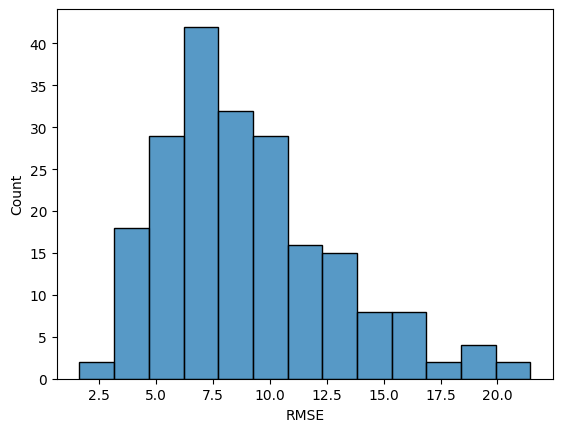

In [ ]:
sns.histplot(results_df['RMSE'])

#### Ploting Code

In [63]:
# plot the time series
forecast_plot = product_test.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-12]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
plt.plot(actual_2023['Date'], actual_2023['Profit_Margin'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()

NameError: name 'model_prophet1' is not defined

### Light GBM

In [ ]:
df['Stock'] = df['Stock'].map({'Y': 1, 'N': 0})
df['Group'] = df['Group'].astype('category').cat.codes
df['customer_category'] = df['customer_category'].astype('category').cat.codes
df['Product_Class'] = df['Product_Class'].astype('category').cat.codes

<ipython-input-220-95e2ef420dda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stock'] = df['Stock'].map({'Y': 1, 'N': 0})
<ipython-input-220-95e2ef420dda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = df['Group'].astype('category').cat.codes
<ipython-input-220-95e2ef420dda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
df['Month_Since_Start'] = (df['Year'] - 2020) * 12 + df['Month']

# Split the data based on the year
train_df = df[df['Year'] <= 2022]
test_df = df[df['Year'] == 2023]

<ipython-input-221-fed7f5ba29d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Since_Start'] = (df['Year'] - 2020) * 12 + df['Month']


In [ ]:
X_train = train_df.drop(['Profit_Margin', 'Year', 'Month'], axis=1)
y_train = train_df['Profit_Margin']
X_test = test_df.drop(['Profit_Margin', 'Year', 'Month'], axis=1)
y_test = test_df['Profit_Margin']

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [ ]:
parameters = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 40,
    'learning_rate': 0.1,
    'verbose': -1  # to suppress unnecessary logs
}
early_stopping_callback = lgb.early_stopping(stopping_rounds=10, verbose=False)

# Train the model with early stopping
lgbm_model = lgb.train(
    params=parameters,
    train_set=train_data,
    num_boost_round=1000,  # maximum number of boosting iterations
    valid_sets=[test_data],  # validation data
    callbacks=[early_stopping_callback]  # list of callbacks
)

In [ ]:
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [ ]:
rmse

10.36725253857789

In [ ]:
# Define the grid of hyperparameters to search
grid_params = {
    'num_leaves': [20, 25, 31, 35, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    # add more parameters here if you wish
}

# Store the results in a list
results = []

# Loop over all combinations of hyperparameters
for num_leaves in grid_params['num_leaves']:
    for learning_rate in grid_params['learning_rate']:
        # Update our parameters
        parameters['num_leaves'] = num_leaves
        parameters['learning_rate'] = learning_rate

        # Train the model with the current set of hyperparameters
        lgbm_model = lgb.train(
            params=parameters,
            train_set=train_data,
            num_boost_round=1000,
            valid_sets=[test_data],
            callbacks=[early_stopping_callback]
        )

        # Make predictions and compute RMSE
        y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
        rmse = mean_squared_error(y_test, y_pred)

        # Store the results
        results.append((num_leaves, learning_rate, rmse))

# Find the best hyperparameters and corresponding RMSE
best_params = sorted(results, key=lambda x: x[2])[0]

print(f"Best parameters: num_leaves = {best_params[0]}, learning_rate = {best_params[1]}")


Best parameters: num_leaves = 40, learning_rate = 0.1


#### Time Series

In [ ]:

# Preprocess the data if needed (e.g., convert categorical variables to numerical format)
ts_df = df.copy()

# Convert 'Year' and 'Month' columns to datetime format
ts_df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Set 'Date' as the index
ts_df.set_index('Date', inplace=True)

# Drop unnecessary columns
ts_df.drop(['Year', 'Month', 'Group', 'customer_category', 'Stock'], axis=1, inplace=True)

# Split the data into training and testing sets
train_size = int(len(ts_df) * 0.8)
train, test = ts_df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
# Define and fit the ARIMA model
model = ARIMA(train['Profit_Margin'], order=(5,1,0))  # Example order, you may need to adjust
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
predictions = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error: 131.7871658253006


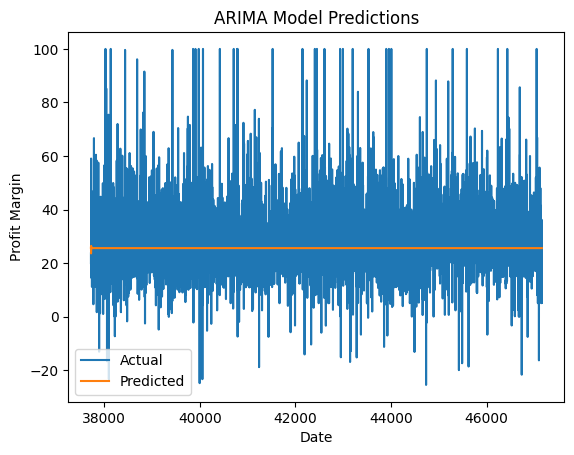

In [ ]:
# Evaluate the model
mse = mean_squared_error(test['Profit_Margin'], predictions)
print('Mean Squared Error:', mse)

# Visualize the predictions
plt.plot(test.index, test['Profit_Margin'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()